<a href="https://colab.research.google.com/github/DorcasO/DorcasO/blob/main/Moringaseedoil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import os

#Define path inside your Google Drive
drive_path = "/content/drive/MyDrive/moringaseed_oil_location/"

# Extract the directory path
dir_path = os.path.dirname(drive_path)

# Create the directory if it doesn't exist
os.makedirs(dir_path, exist_ok=True)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from mpl_toolkits.axes_grid1 import make_axes_locatable  # nice colour‑bars

plt.style.use("ggplot")
sns.set_context("talk")


In [60]:
ROOT = Path("/content/drive/MyDrive/moringaseed_oil_location/Moringa_Seed data_geolocation.xlsx/")

try:
    fames = pd.read_excel("/content/drive/MyDrive/moringaseed_oil_location  /FAMEs_means.xlsx")
    tocopherols = pd.read_excel("/content/drive/MyDrive/moringaseed_oil_location  /Tocopherols_means.xlsx")
    phytosterols = pd.read_excel("/content/drive/MyDrive/moringaseed_oil_location  /Phytosterols_means.xlsx")
    geo = pd.read_excel("/content/drive/MyDrive/moringaseed_oil_location  /Geolocations.xlsx")

    print("✓ Data loaded successfully!")
except Exception as e:
    print(f"‼ Data loading failed: {e}")


✓ Data loaded successfully!


In [63]:
#1. Merge chemical blocks + coordinates
dfs = [fames,tocopherols, phytosterols]
df  = dfs[0]
for d in dfs[1:]:
    df = df.merge(d, on="Samples", how="inner")

df = df.merge(geo, on="Samples", how="left")   # adds Latitude, Longitude, GeoLocation
print("Final shape:", df.shape)

Final shape: (45, 46)


In [64]:
#2. Quick glance
display(df.head())
display(df.describe(include="all").T)


Samples     C14.0      C16.0    C16.1D9     C17.0      C18.0     C18.1D9  \
0    IMO9  1.513333  84.813333  18.133333  1.346667  80.093333  882.256667   
1    KMO2  1.143333  83.676667  30.720000  1.490000  77.593333  888.203333   
2    KMO4  1.576667  73.860000  18.740000  1.713333  63.683333  932.836667   
3    KMO6  1.796667  89.236667  25.386667  1.390000  74.870000  943.650000   
4    KMO7  1.743333  84.786667  23.460000  1.440000  58.226667  971.636667   

     C18.1D11      C18.2   C18.3n3  ...    Unknown1    Unknown2  \
0   65.763333   5.216667  1.490000  ...   92.140000   92.140000   
1  103.750000  11.070000  3.023333  ...   69.010000   82.456667   
2   92.170000   7.343333  2.416667  ...  117.926667  109.100000   
3   98.816667   7.163333  1.703333  ...   68.173333   68.173333   
4  111.920000   9.356667  1.900000  ...   79.523333   79.523333   

   D7.Stigmastenol  D7.Avenasterol    m.z_512  X24.Methyl.Cycloart  \
0       154.066667      123.230000   9.856667            48.463333   
1       155.473333       54.543333   9.986667           109.053333   
2       136.493333       79.716667  15.460000           119.660000   
3       103.590000       42.233333   3.600000            60.650000   
4        68.446667       37.800000   6.756667            52.026667   

   Citrostadienol   Latitude  Longitude  Geo.location  
0       59.556667  31.488920   76.01406         India  
1       81.023333   1.205038   36.88309         Kenya  
2       68.753333   0.461796   34.09980         Kenya  
3       40.650000  -1.292200   36.82278         Kenya  
4       31.480000  -2.181160   40.81910         Kenya  

[5 rows x 46 columns]

count unique    top freq         mean         std  \
Samples                45     45   IMO9    1          NaN         NaN   
C14.0                45.0    NaN    NaN  NaN     1.241519    0.236153   
C16.0                45.0    NaN    NaN  NaN    82.971148   11.907014   
C16.1D9              45.0    NaN    NaN  NaN    18.970889    6.932194   
C17.0                45.0    NaN    NaN  NaN     1.331296     0.20094   
C18.0                45.0    NaN    NaN  NaN     75.33037    15.08961   
C18.1D9              45.0    NaN    NaN  NaN   880.638185   65.932577   
C18.1D11             45.0    NaN    NaN  NaN    69.504704   23.819228   
C18.2                45.0    NaN    NaN  NaN     7.995889    1.379964   
C18.3n3              45.0    NaN    NaN  NaN     2.057185    0.818228   
C20.0                45.0    NaN    NaN  NaN       46.024    7.517313   
C20.1n11             45.0    NaN    NaN  NaN    31.328889    5.013126   
C20.1n13             45.0    NaN    NaN  NaN     1.137741    0.445236   
C22.0                45.0    NaN    NaN  NaN    83.715185   13.315394   
C22.1n13             45.0    NaN    NaN  NaN     1.571444    0.556635   
C24.0                45.0    NaN    NaN  NaN    14.926037    3.266777   
Total                45.0    NaN    NaN  NaN  1318.744926   91.494706   
AlphaT               45.0    NaN    NaN  NaN    52.126222    6.134411   
Alpha.T3             45.0    NaN    NaN  NaN    25.297185    6.309589   
Beta.T               45.0    NaN    NaN  NaN     1.661741    0.832289   
Gamma.T              45.0    NaN    NaN  NaN     16.42663    5.998094   
Gamma.T3             45.0    NaN    NaN  NaN     2.824889    0.744517   
Delta                45.0    NaN    NaN  NaN     1.663148    0.653619   
Cholesterol          45.0    NaN    NaN  NaN  1120.970593  162.114789   
Cholestanol          45.0    NaN    NaN  NaN  1380.057704   118.61848   
Brassicasterol       45.0    NaN    NaN  NaN    12.372815    2.386588   
Ergostadienol        45.0    NaN    NaN  NaN    36.785407   15.268061   
Campesterol          45.0    NaN    NaN  NaN   421.992741  163.176016   
Campestanol          45.0    NaN    NaN  NaN    21.873481    4.509519   
Stigmasterol         45.0    NaN    NaN  NaN   584.082444  214.546817   
Stigmastanol         45.0    NaN    NaN  NaN    38.252296    9.572275   
m.z_472              45.0    NaN    NaN  NaN     18.01837    6.588529   
Clerosterol          45.0    NaN    NaN  NaN    36.141259    8.853687   
Obtusifoliol         45.0    NaN    NaN  NaN    34.766185   11.481523   
b.Sitosterol         45.0    NaN    NaN  NaN  1277.200222  505.300577   
D5.Avenasterol       45.0    NaN    NaN  NaN   317.786481  124.800627   
Unknown1             45.0    NaN    NaN  NaN    67.466889   16.225287   
Unknown2             45.0    NaN    NaN  NaN    67.207037     16.0846   
D7.Stigmastenol      45.0    NaN    NaN  NaN    89.514852   45.924764   
D7.Avenasterol       45.0    NaN    NaN  NaN    42.714556   23.243463   
m.z_512              45.0    NaN    NaN  NaN    12.551963    4.281366   
X24.Methyl.Cycloart  45.0    NaN    NaN  NaN    66.222815   28.794002   
Citrostadienol       45.0    NaN    NaN  NaN    35.765185   14.963476   
Latitude             45.0    NaN    NaN  NaN     8.092051     5.39209   
Longitude            45.0    NaN    NaN  NaN    14.689459   23.164452   
Geo.location           45     13  Kenya    8          NaN         NaN   

                            min          25%          50%          75%  \
Samples                     NaN          NaN          NaN          NaN   
C14.0                  0.913333     1.073333     1.186667     1.396667   
C16.0                     52.67        77.11    84.406667    87.756667   
C16.1D9                1.973333        16.83    18.983333    23.526667   
C17.0                  0.446667     1.293333         1.34         1.43   
C18.0                 53.243333         63.6        74.87        83.58   
C18.1D9              602.693333   853.673333       882.48   925.146667

In [65]:
#3. Variable groups
headline_fa = ["C14.0", "C16.0", "C16.1D9"]

NUM_BLOCKS = {
    "FAMEs":         headline_fa +
                     [c for c in fames.columns
                      if c not in ("SampleID",) + tuple(headline_fa)],
    "Tocopherols":   [c for c in tocopherols.columns if c != "Samples"],
    "Phytosterols":  [c for c in phytosterols.columns if c != "Samples"],
}


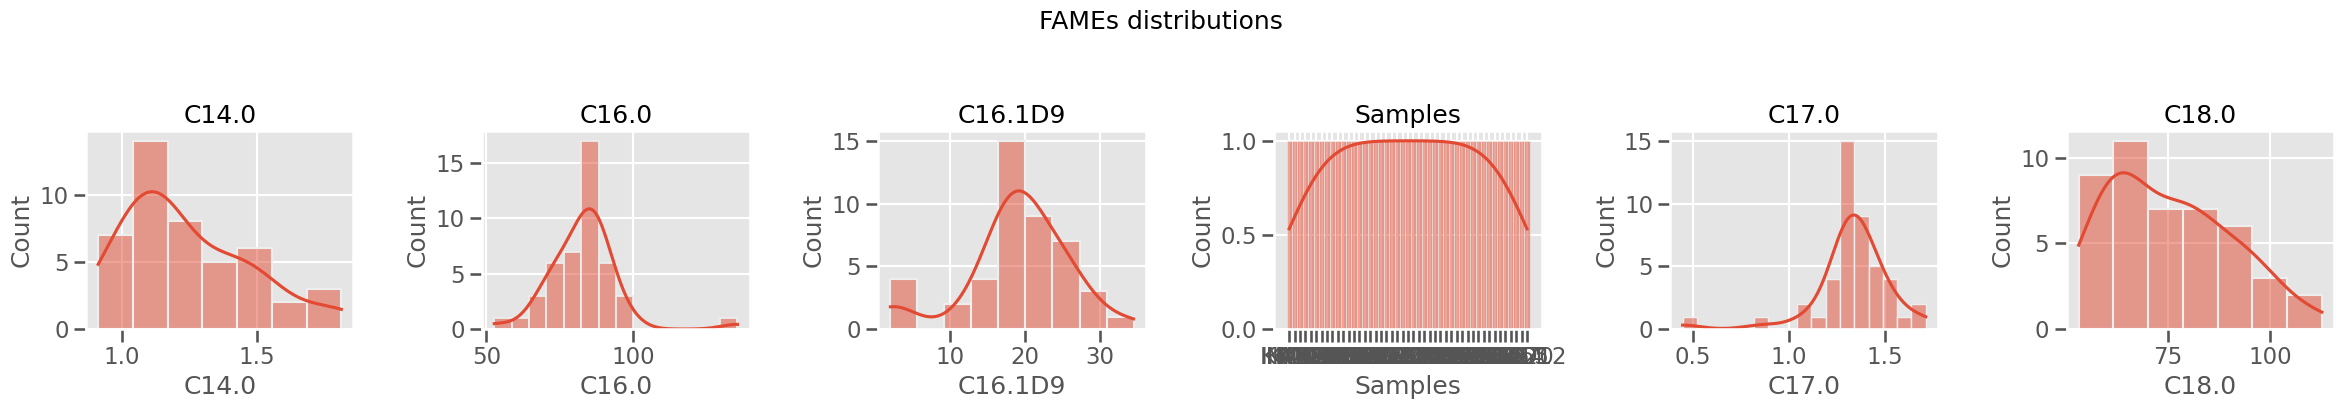

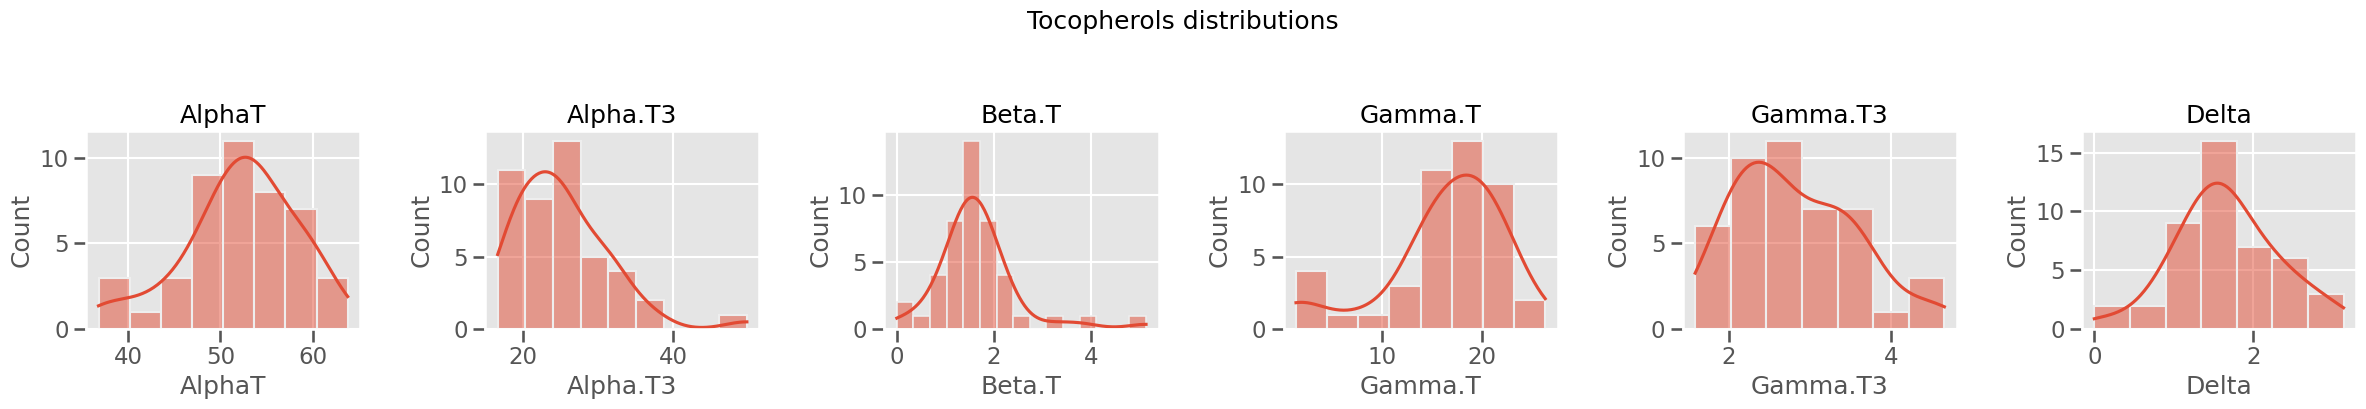

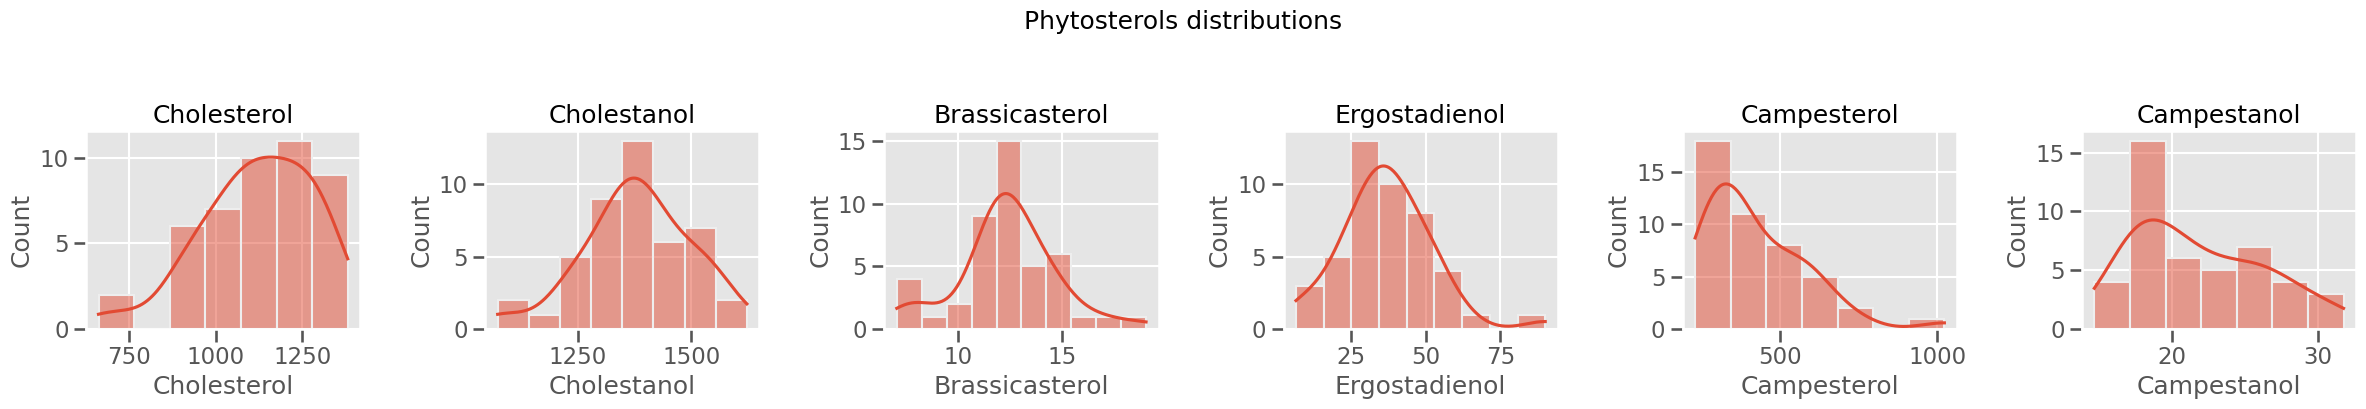

In [66]:
#4.Distributions
def hist_grid(cols, title):
    n = len(cols)
    fig, axes = plt.subplots(1, n, figsize=(4*n, 4))
    for ax, col in zip(axes, cols):
        sns.histplot(df[col], kde=True, ax=ax)
        ax.set_title(col)
    fig.suptitle(title, y=1.04, fontsize=18)
    plt.tight_layout()

for block, cols in NUM_BLOCKS.items():
    hist_grid(cols[:min(6, len(cols))], f"{block} distributions")



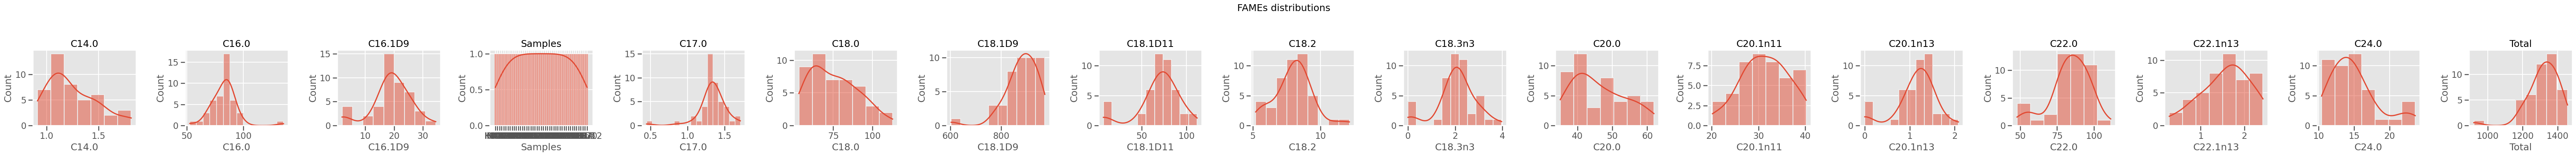

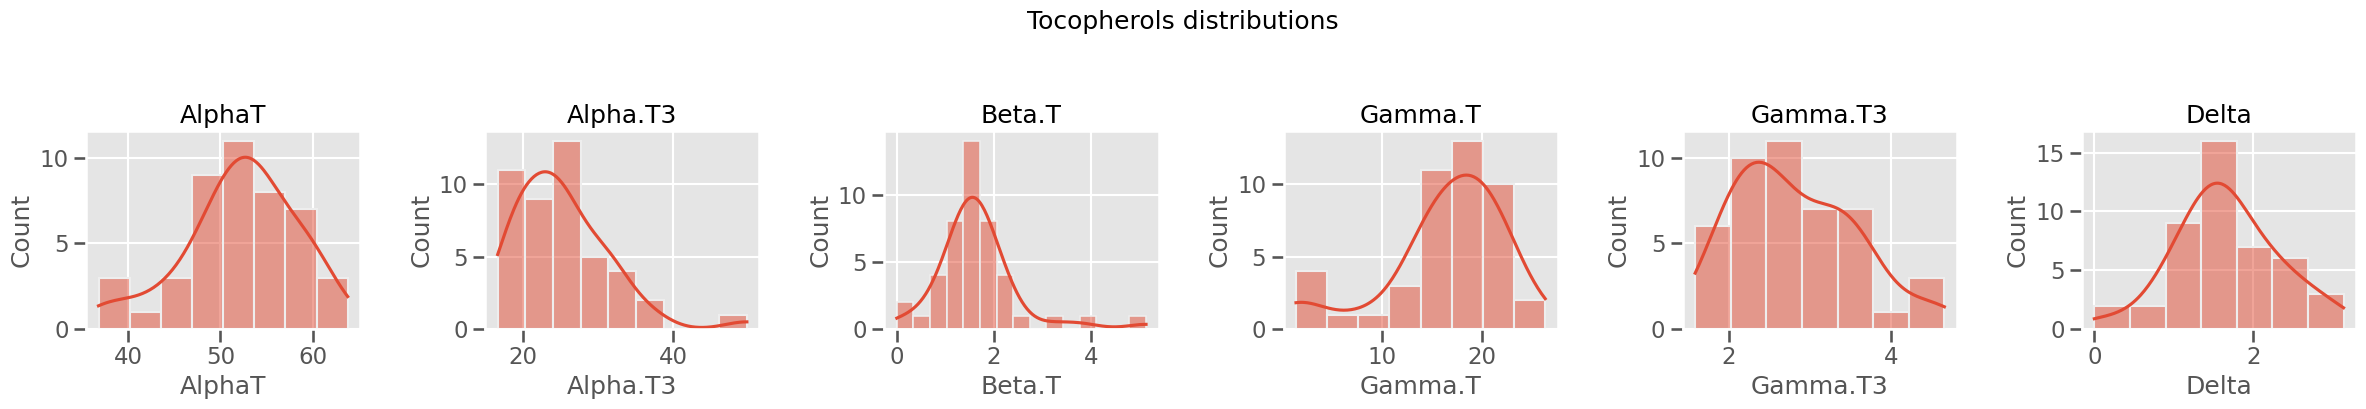

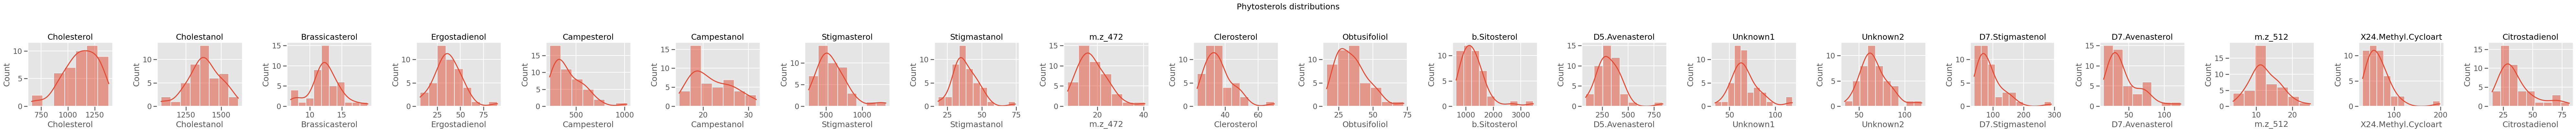

In [68]:
#4.Distributions
def hist_grid(cols, title):
    n = len(cols)
    fig, axes = plt.subplots(1, n, figsize=(4*n, 4))
    for ax, col in zip(axes, cols):
        sns.histplot(df[col], kde=True, ax=ax)
        ax.set_title(col)
    fig.suptitle(title, y=1.04, fontsize=18)
    plt.tight_layout()

for block, cols in NUM_BLOCKS.items():
    hist_grid(cols[:min(20, len(cols))], f"{block} distributions")



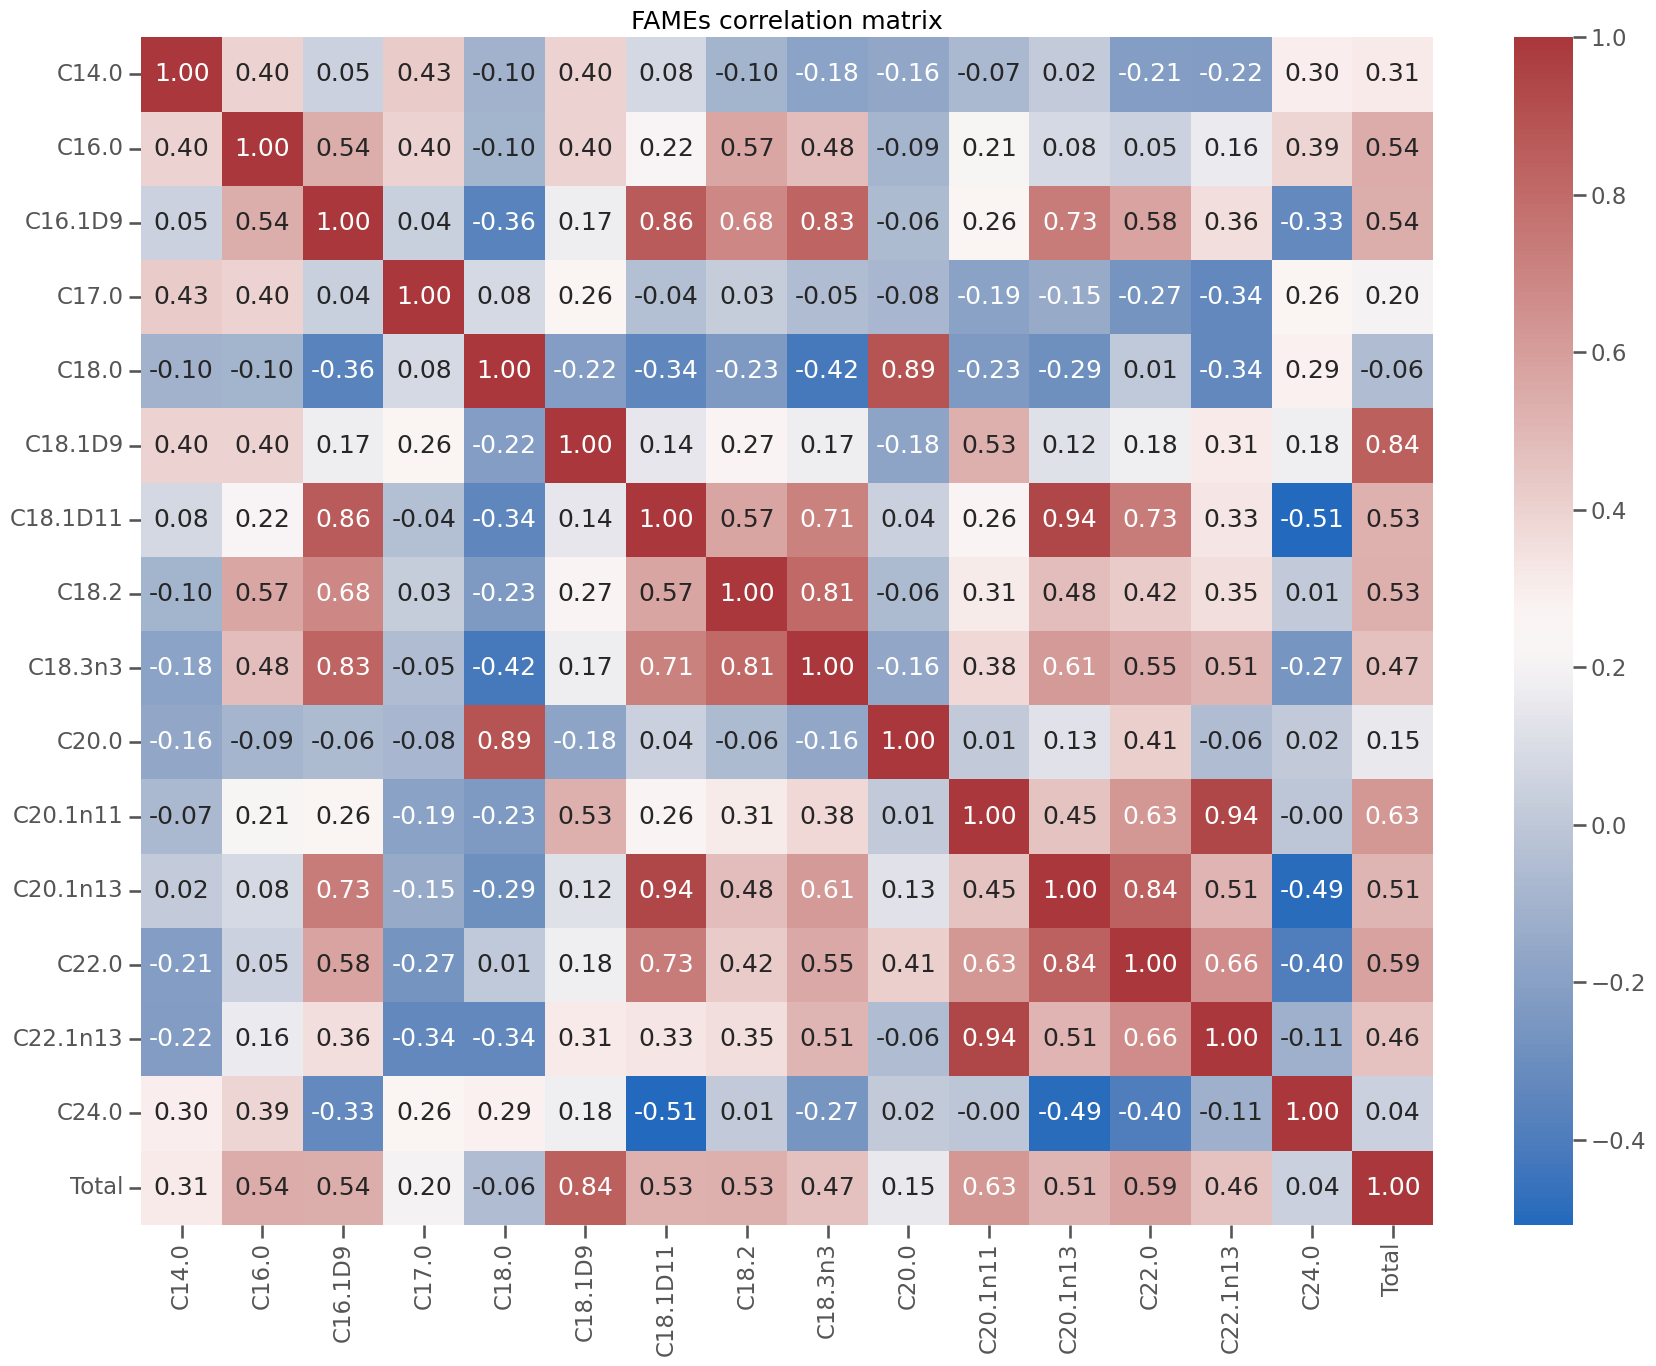

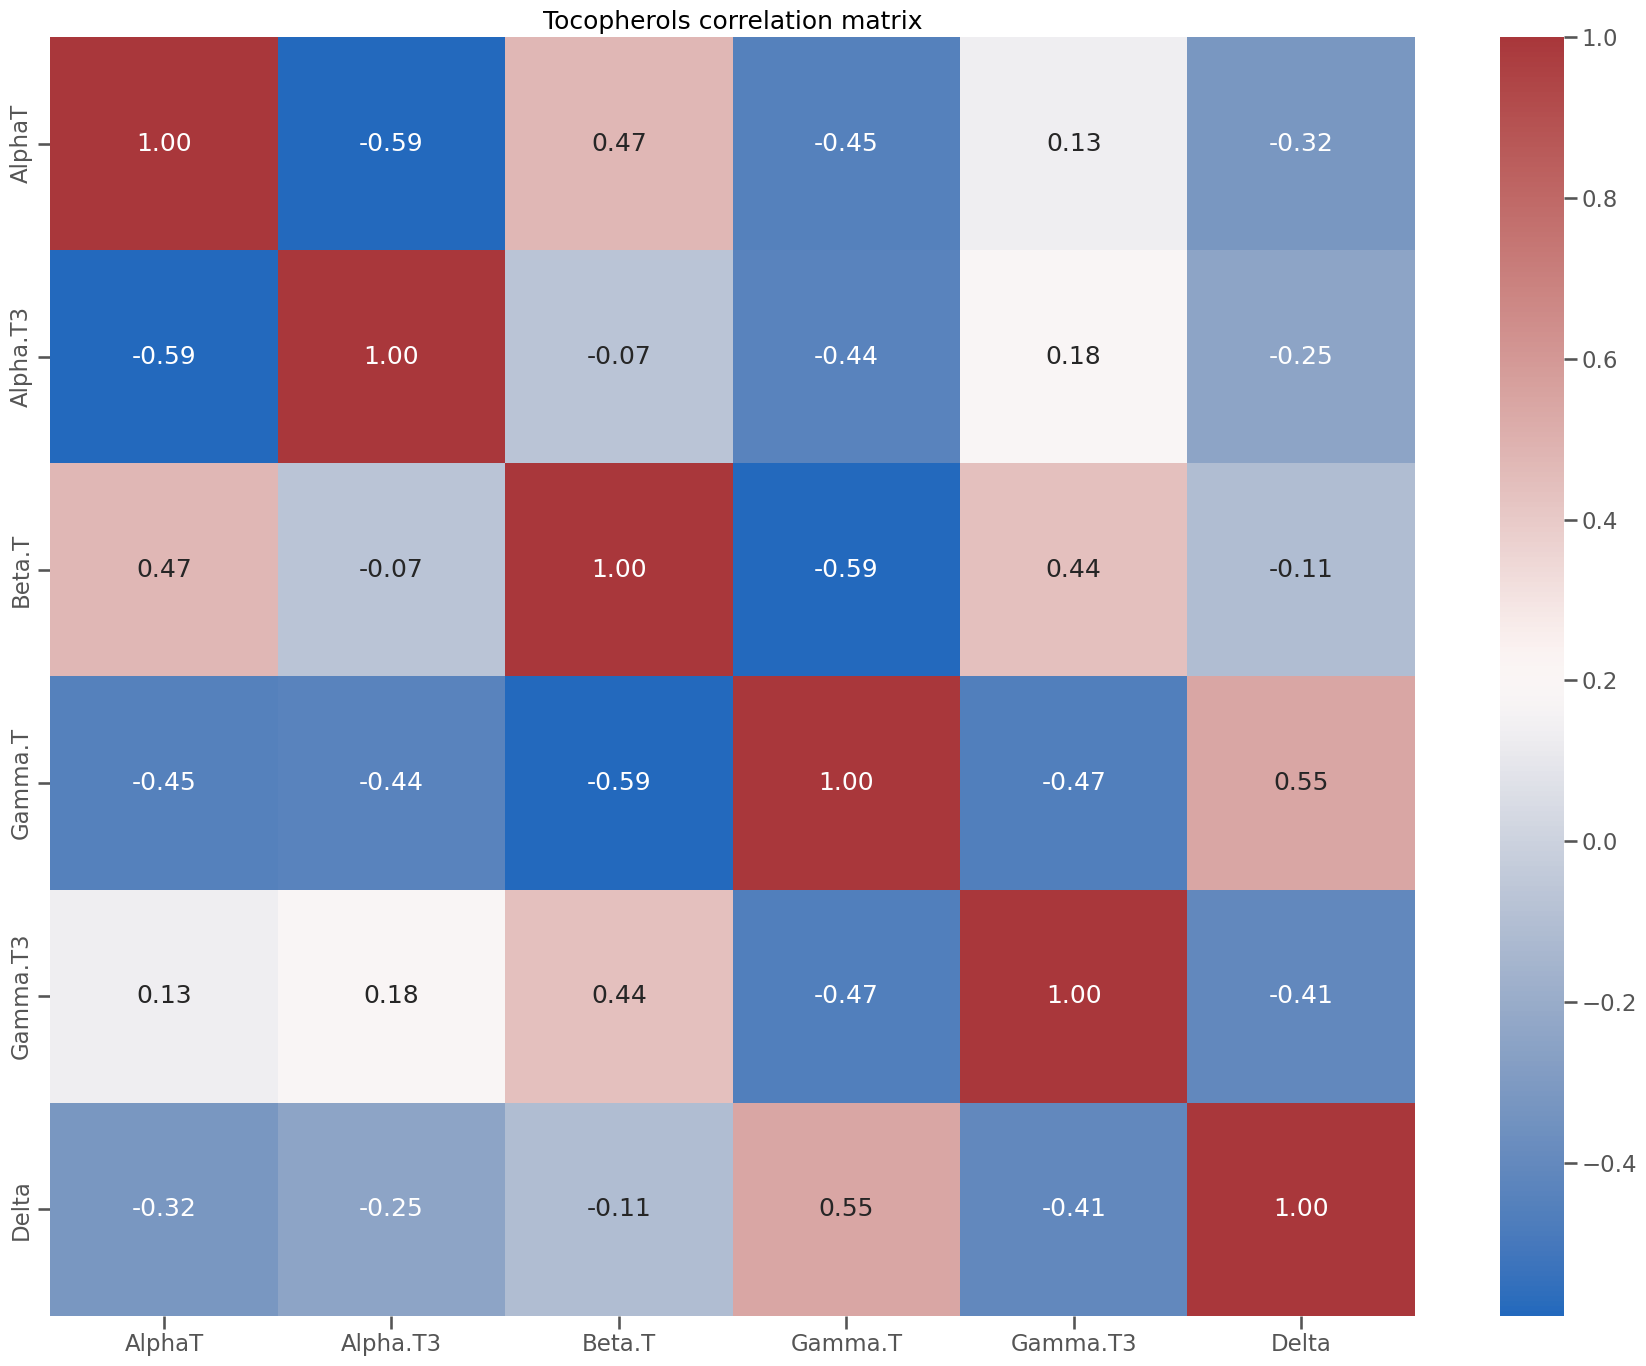

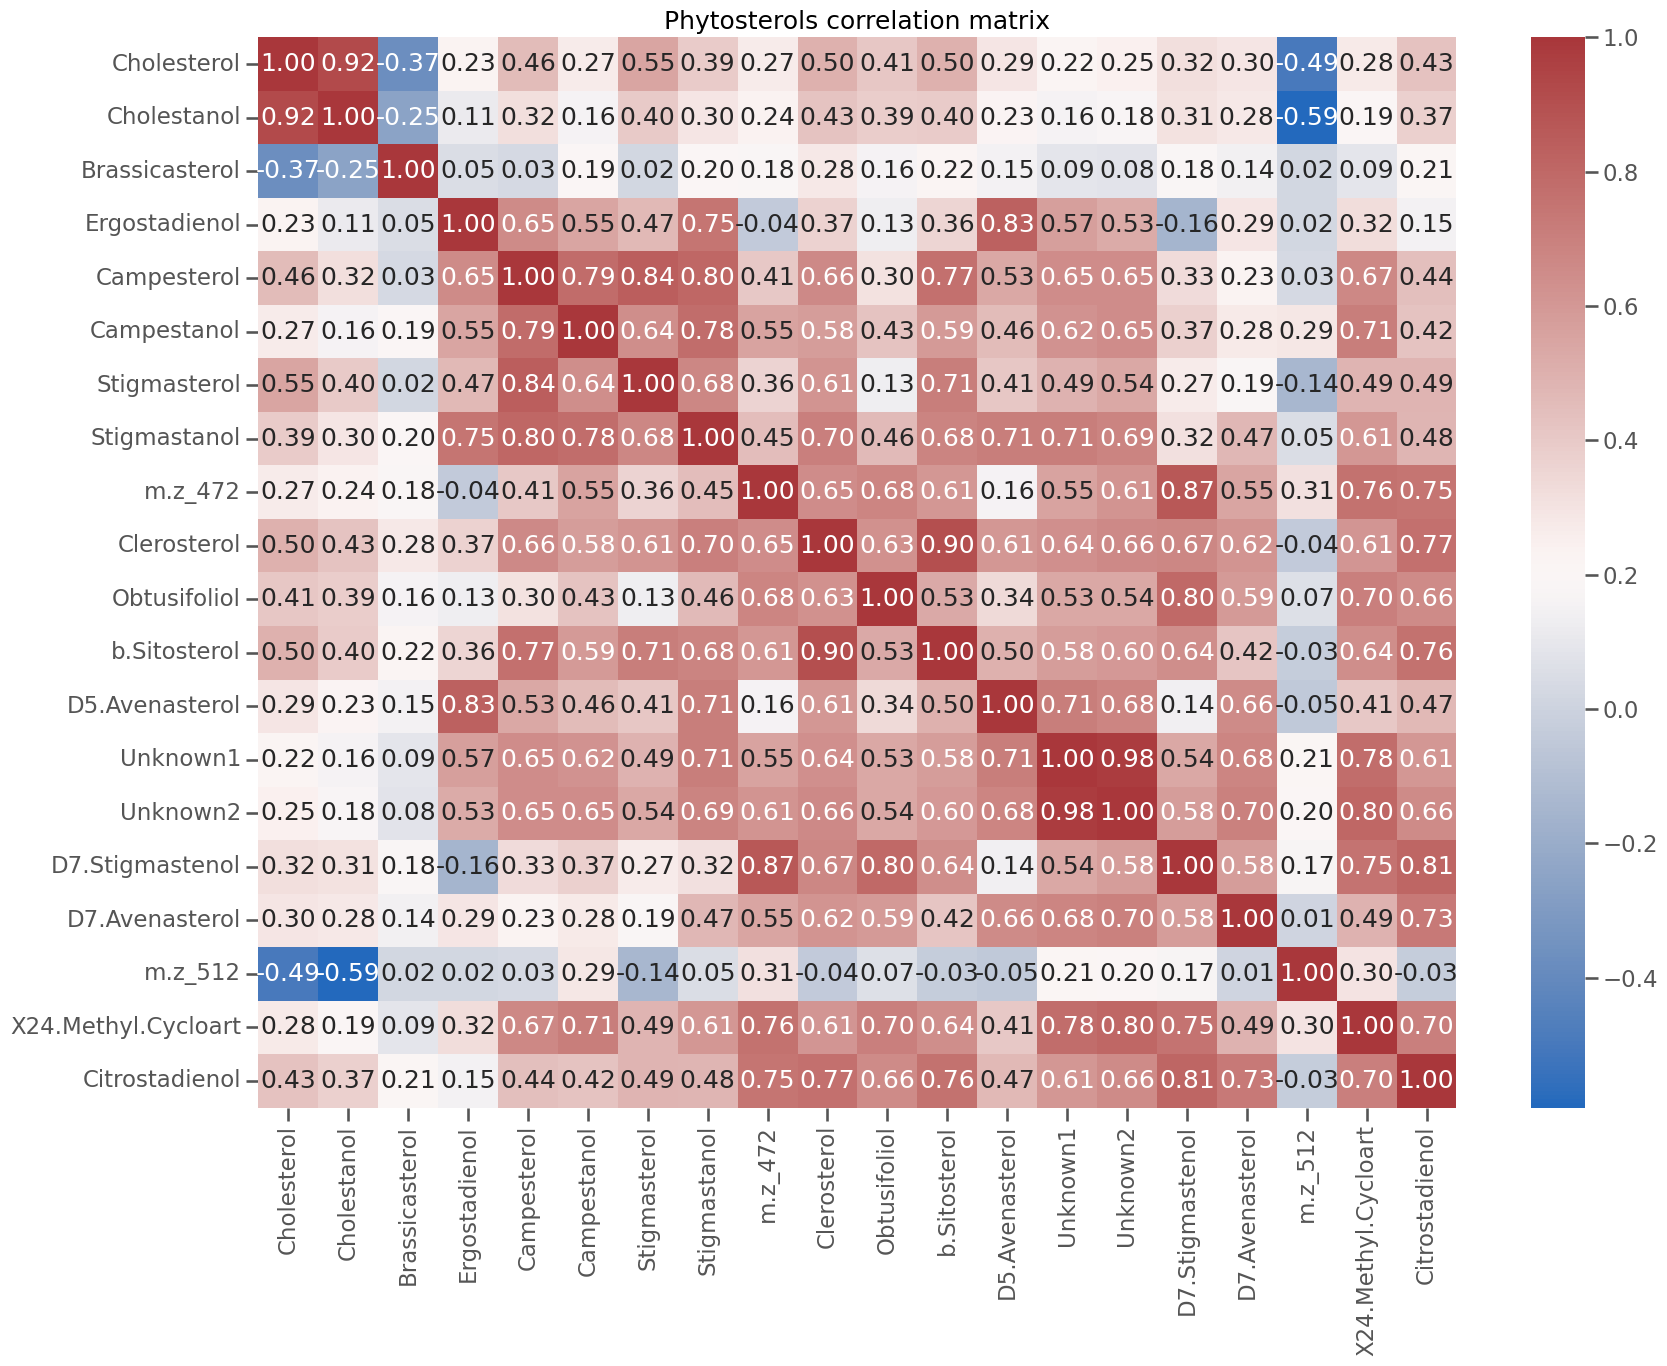

In [71]:
 #5. Correlation heat maps

for block, cols in NUM_BLOCKS.items():
    plt.figure(figsize=(18,14))
    # Exclude non-numeric columns like 'Samples' from correlation calculation
    numeric_cols = df[cols].select_dtypes(include=np.number).columns.tolist()
    sns.heatmap(df[numeric_cols].corr(), cmap="vlag", annot=True, fmt=".2f")
    plt.title(f"{block} correlation matrix")
    plt.tight_layout()

              C14.0  C16.0  C16.1D9
Geo.location                       
India          1.51  84.81    18.13
Kenya          1.49  81.62    13.46
Kwara IG       1.43  86.64    18.88
Philippines    1.36  75.78    19.10
Osun NIG       1.29  86.24    23.33
Mali           1.28  86.22    21.04
Ekiti NIG      1.20  87.63    22.86
Kwara NIG      1.19  80.07    18.58
KatsinaNIG     1.15  80.03    17.66
Oyo NIG        1.14  82.36    18.84
PlateauNIG     1.10  87.80    22.31
Burkina Faso   1.00  84.52    18.48
Ogun NIG       0.93  68.22    20.04


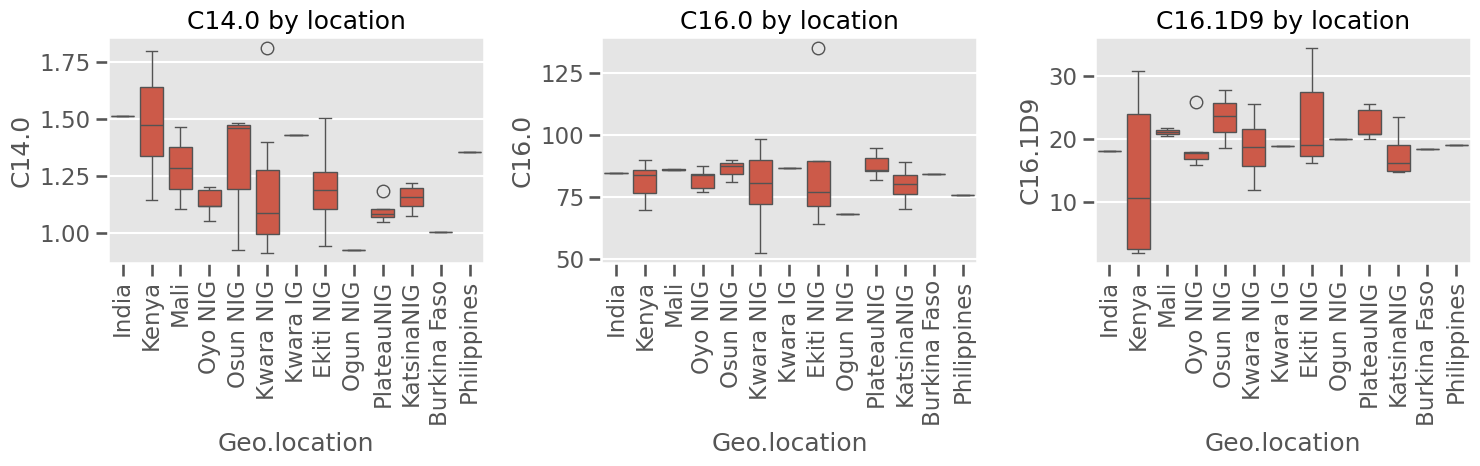

In [78]:
#6. Geography effect (box‑plots) -----------------------------------

plt.figure(figsize=(15,5))
for i, col in enumerate(headline_fa, 1):
    plt.subplot(1,3,i)
    sns.boxplot(data=df, x="Geo.location", y=col)
    plt.xticks(rotation=90)
    plt.title(f"{col} by location")
plt.tight_layout()

regional_means = df.groupby("Geo.location")[headline_fa].mean().sort_values("C14.0", ascending=False)
print(regional_means.round(2))

              AlphaT  Alpha.T3  Beta.T  Gamma.T  Gamma.T3  Delta
Geo.location                                                    
Kenya          55.07     29.71    2.59     7.76      3.30   1.57
PlateauNIG     54.80     24.41    1.57    14.52      3.31   1.40
Oyo NIG        54.63     21.09    1.51    18.64      2.87   1.27
Burkina Faso   54.17     25.81    2.03    14.20      2.01   1.77
Kwara NIG      53.24     20.68    1.64    19.88      2.65   1.90
Philippines    53.07     26.42    3.20    12.38      2.59   2.35
Kwara IG       53.06     21.25    1.55    20.09      2.23   1.83
KatsinaNIG     52.24     23.23    1.20    19.04      2.38   1.90
Osun NIG       50.57     23.73    1.45    19.31      3.23   1.71
Ogun NIG       49.88     24.62    1.57    19.08      3.24   1.60
Ekiti NIG      47.88     29.82    1.37    16.96      2.47   1.49
Mali           42.03     30.10    0.56    23.08      2.12   2.11
India          37.74     36.26    0.00    21.55      2.69   1.75


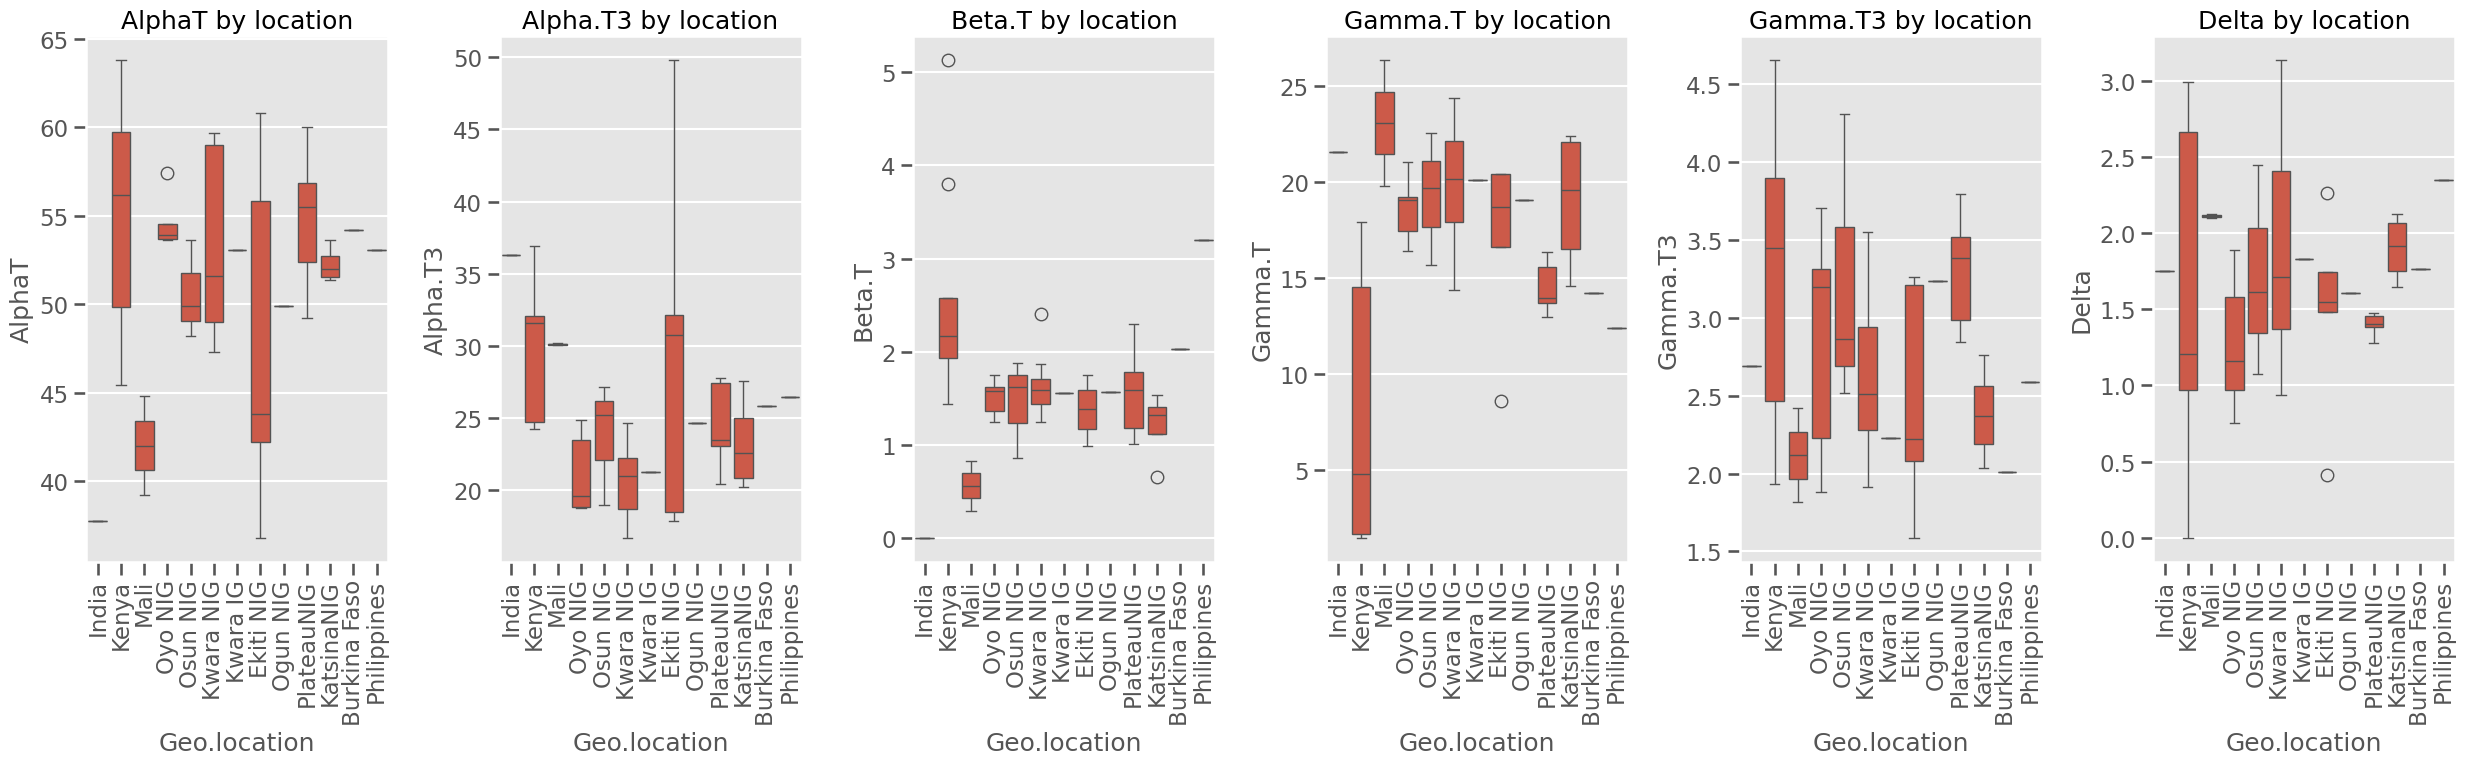

In [85]:
#6. Geography effect (box‑plots) -----------------------------------

# Define headline_tocopherols
headline_tocopherols = NUM_BLOCKS["Tocopherols"]

plt.figure(figsize=(25, 8))
# Adjust subplot grid based on the number of tocopherol variables (max 6 columns)
n_tocopherols = len(headline_tocopherols)
for i, col in enumerate(headline_tocopherols[:min(6, n_tocopherols)], 1):
    plt.subplot(1, min(6, n_tocopherols), i)
    sns.boxplot(data=df, x="Geo.location", y=col)
    plt.xticks(rotation=90)
    plt.title(f"{col} by location")
plt.tight_layout()

regional_means = df.groupby("Geo.location")[headline_tocopherols].mean().sort_values("AlphaT", ascending=False)
print(regional_means.round(2))

              Cholesterol  Cholestanol  Brassicasterol  Ergostadienol  \
Geo.location                                                            
Mali              1324.93      1554.82           13.12          59.09   
Philippines       1317.51      1527.10           12.62          44.27   
Kenya             1255.23      1473.02           13.82          32.11   
Burkina Faso      1245.83      1451.87           11.94          55.06   
India             1244.37      1460.51           11.59          27.86   
KatsinaNIG        1237.82      1465.00           10.98          41.22   
PlateauNIG        1172.31      1369.27           10.23          40.50   
Ekiti NIG         1106.88      1364.88           11.39          30.87   
Ogun NIG          1100.37      1373.37           11.55          33.29   
Kwara NIG         1058.44      1343.35           11.34          40.21   
Kwara IG          1005.54      1333.92           12.47          47.83   
Osun NIG           959.63      1224.37           12

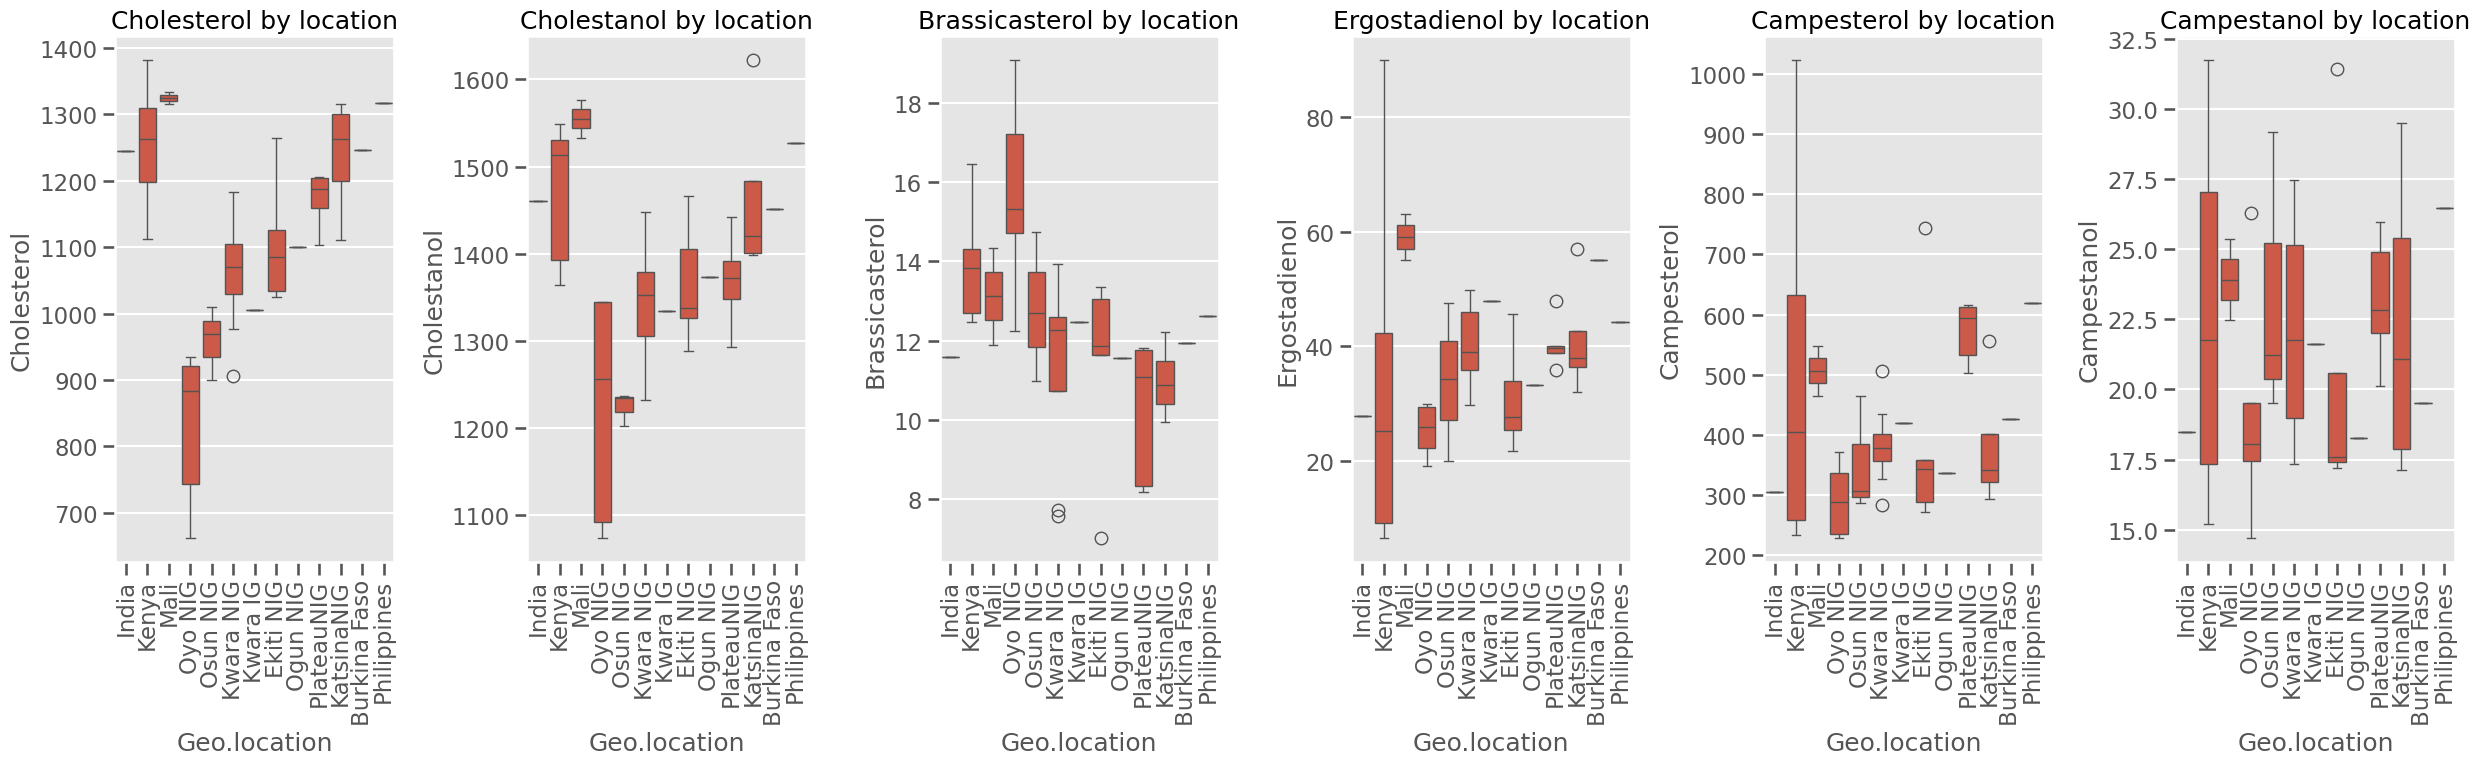

In [88]:
# Define headline_phytosterols
headline_phytosterols = NUM_BLOCKS["Phytosterols"]

plt.figure(figsize=(25, 8))
# Adjust subplot grid based on the number of phytosterols variables (max 6 columns)
n_phytosterols = len(headline_phytosterols)
for i, col in enumerate(headline_phytosterols[:min(6, n_phytosterols)], 1):
    plt.subplot(1, min(6, n_phytosterols), i)
    sns.boxplot(data=df, x="Geo.location", y=col)
    plt.xticks(rotation=90)
    plt.title(f"{col} by location")
plt.tight_layout()

regional_means = df.groupby("Geo.location")[headline_phytosterols].mean().sort_values("Cholesterol", ascending=False)
print(regional_means.round(2))

              C14.0  C16.0  C16.1D9  C17.0   C18.0  C18.1D9  C18.1D11  C18.2  \
Geo.location                                                                   
India          1.51  84.81    18.13   1.35   80.09   882.26     65.76   5.22   
Kenya          1.49  81.62    13.46   1.54   81.81   902.04     54.51   7.29   
Kwara IG       1.43  86.64    18.88   1.29   63.84   843.96     73.15   8.14   
Philippines    1.36  75.78    19.10   1.36   80.41   957.89     74.46   6.94   
Osun NIG       1.29  86.24    23.33   1.32   79.65   852.42     84.21   8.28   
Mali           1.28  86.22    21.04   1.36   80.78   913.72     69.04   7.33   
Ekiti NIG      1.20  87.63    22.86   1.33   72.47   848.47     75.61   8.39   
Kwara NIG      1.19  80.07    18.58   1.23   69.05   854.83     72.64   8.20   
KatsinaNIG     1.15  80.03    17.66   1.33   76.85   910.14     70.03   7.98   
Oyo NIG        1.14  82.36    18.84   1.20   85.15   862.61     71.42   8.14   
PlateauNIG     1.10  87.80    22.31   1.

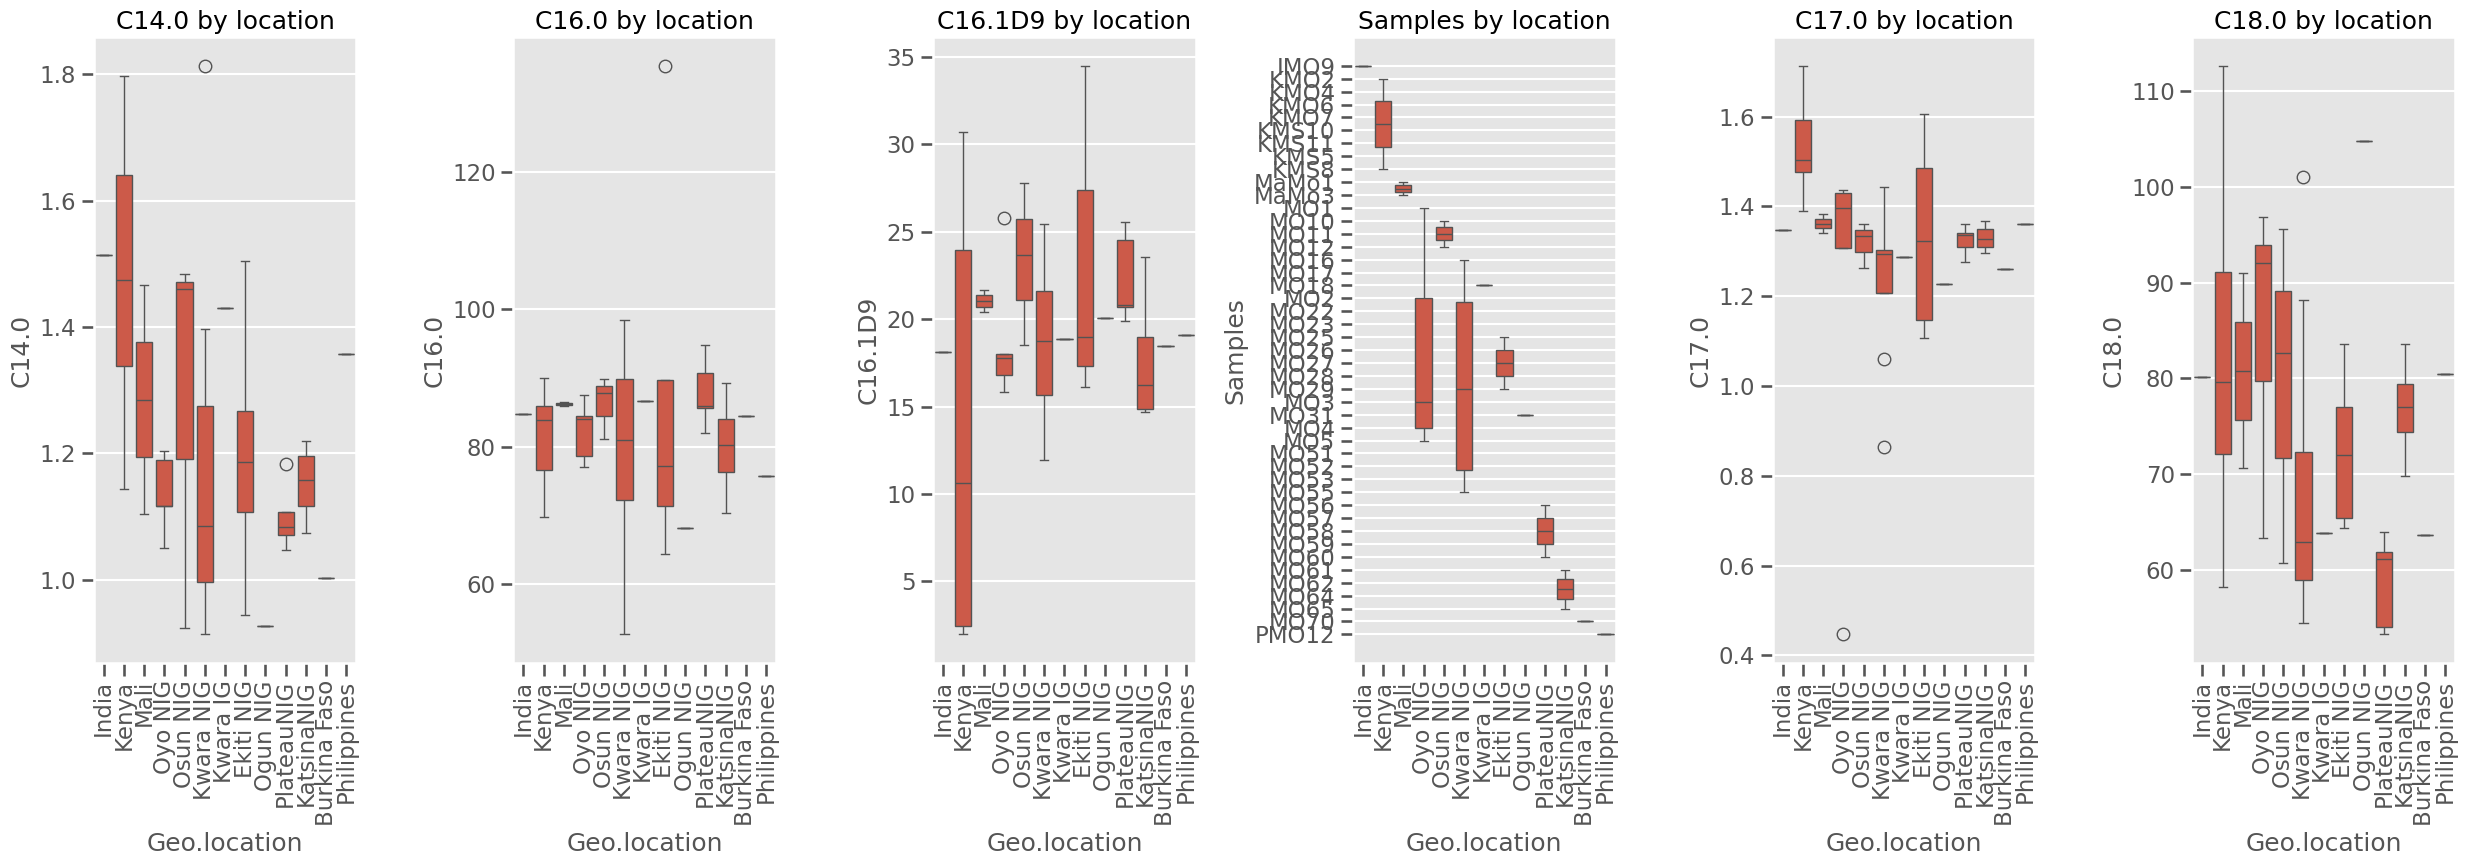

In [97]:
# Define headline_fames
headline_fames = NUM_BLOCKS["FAMEs"]

plt.figure(figsize=(25, 9))
# Adjust subplot grid based on the number of fames variables (max 6 columns)
n_fames = len(headline_fames)
for i, col in enumerate(headline_fames[:min(6, n_fames)], 1):
    plt.subplot(1, min(6, n_fames), i)
    sns.boxplot(data=df, x="Geo.location", y=col)
    plt.xticks(rotation=90)
    plt.title(f"{col} by location")
plt.tight_layout()

# Exclude non-numeric columns like 'Samples' before calculating the mean
numeric_fames_cols = df[headline_fames].select_dtypes(include=np.number).columns.tolist()
regional_means = df.groupby("Geo.location")[numeric_fames_cols].mean().sort_values("C14.0", ascending=False)
print(regional_means.round(2))

In [98]:
import os
import matplotlib.pyplot as plt
from pathlib import Path

# Define where to save figures
SAVE_DIR = Path("/content/drive/MyDrive/moringaseed_oil_location/figures")
SAVE_DIR.mkdir(parents=True, exist_ok=True)  # create if not exists

def save_fig(name, dpi=300):
    """Save current Matplotlib figure to Google Drive"""
    path = SAVE_DIR / f"{name}.png"
    plt.savefig(path, dpi=dpi, bbox_inches='tight')
    print(f"✓ Saved: {path}")


✓ Saved: /content/drive/MyDrive/moringaseed_oil_location/figures/PCA_FAMEs.png
✓ Saved: /content/drive/MyDrive/moringaseed_oil_location/figures/PCA_Tocopherols.png
✓ Saved: /content/drive/MyDrive/moringaseed_oil_location/figures/PCA_Phytosterols.png


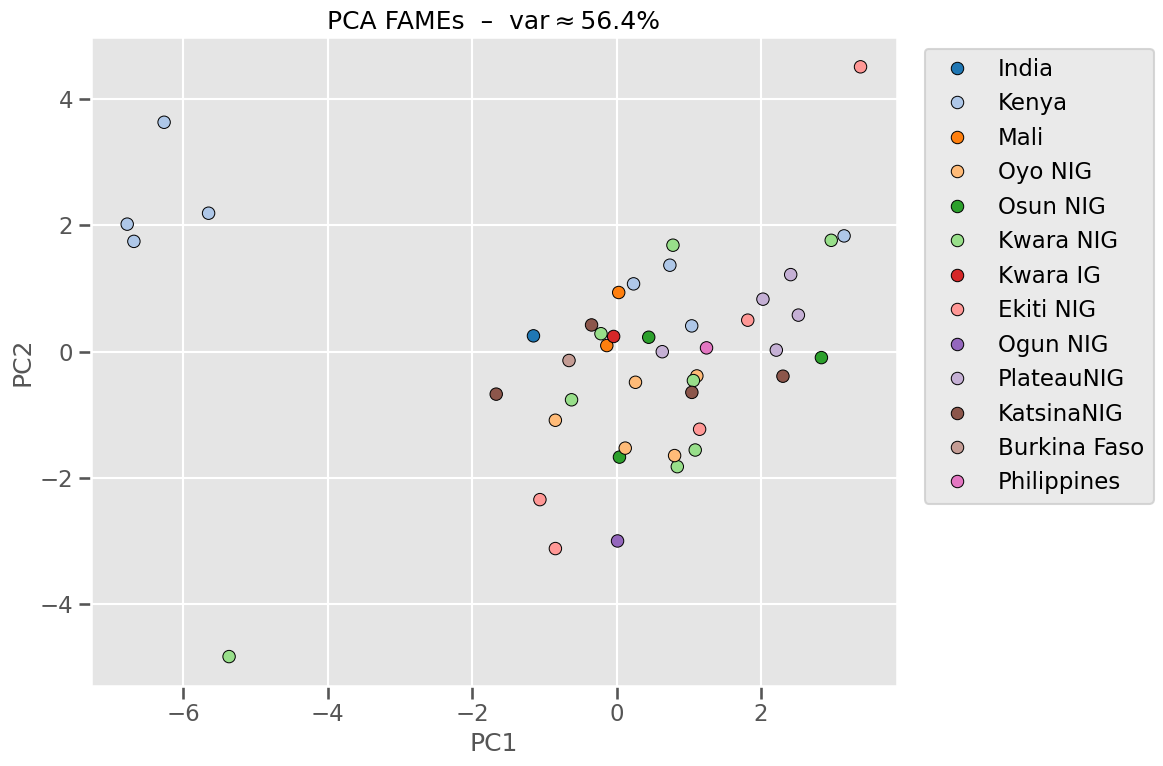

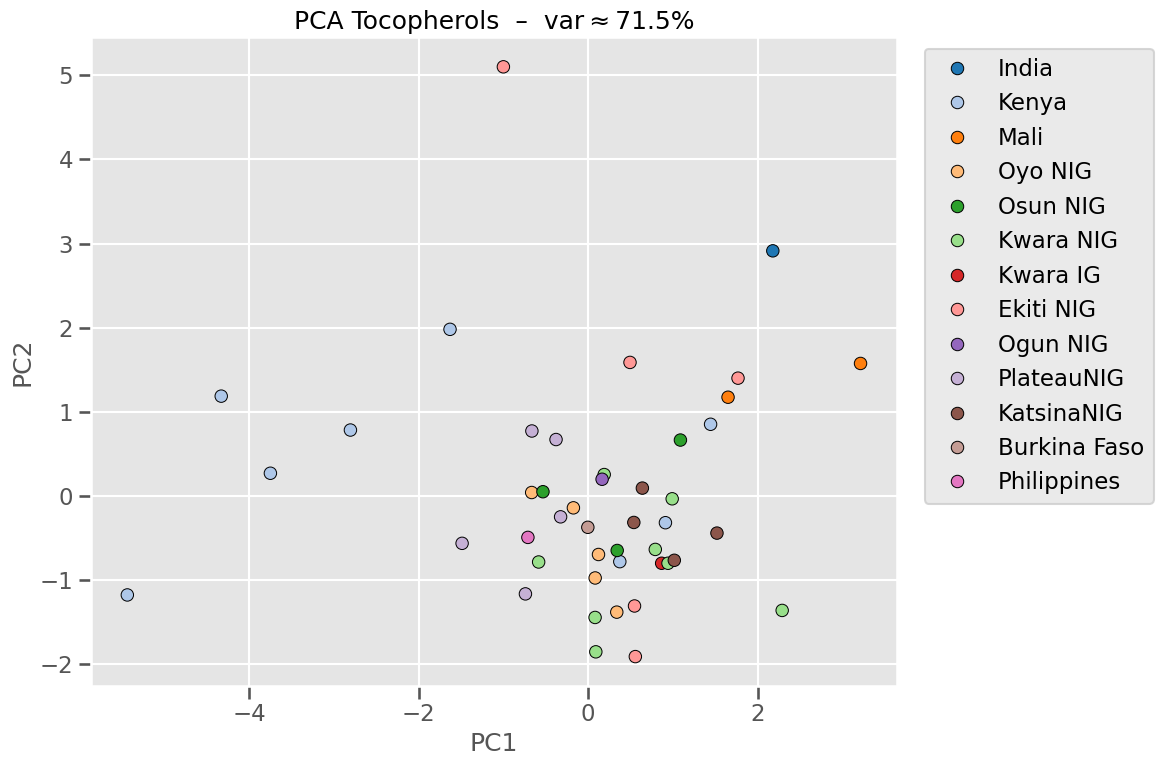

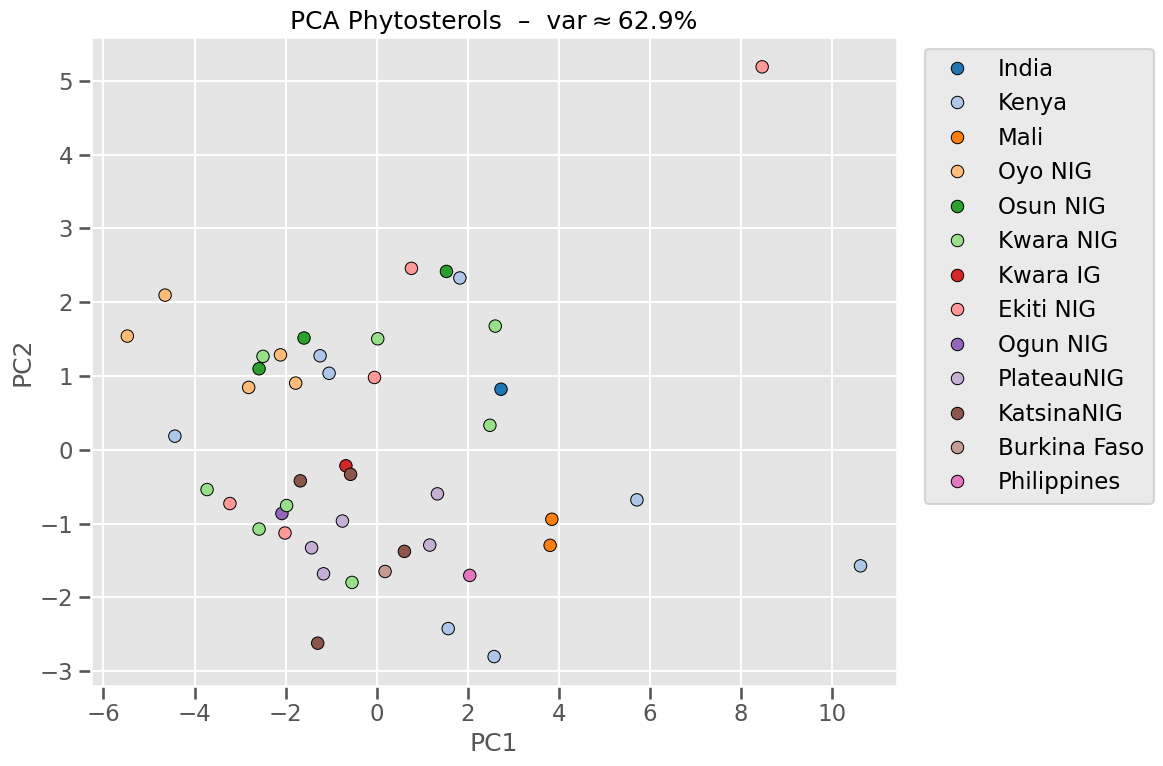

In [102]:
# 7. PCA per block ---------------------------------------------------
# ===================================================================
def pca_scatter(data, label_col, title):
    X = StandardScaler().fit_transform(data)
    pca = PCA(n_components=2, random_state=42)
    pcs = pca.fit_transform(X)
    pc_df = pd.DataFrame(pcs, columns=["PC1","PC2"])
    pc_df[label_col] = df[label_col].values
    sns.scatterplot(data=pc_df, x="PC1", y="PC2",
                    hue=label_col, palette="tab20", s=80, edgecolor="k")
    plt.title(f"{title}  –  var ≈ {pca.explained_variance_ratio_.sum():.1%}")
    plt.legend(bbox_to_anchor=(1.02,1), loc="upper left")
    plt.tight_layout()

for block, cols in NUM_BLOCKS.items():
    plt.figure(figsize=(12,8))
    # Exclude non-numeric columns like 'Samples' from PCA calculation
    numeric_cols = df[cols].select_dtypes(include=np.number).columns.tolist()
    if numeric_cols: # Ensure there are numeric columns to perform PCA on
        pca_scatter(df[numeric_cols], "Geo.location", f"PCA {block}")
        save_fig(f"PCA_{block}")
    else:
        print(f"Skipping PCA for {block} as no numeric columns found.")

✓ Saved: /content/drive/MyDrive/moringaseed_oil_location/figures/K-means_FAMEs.png


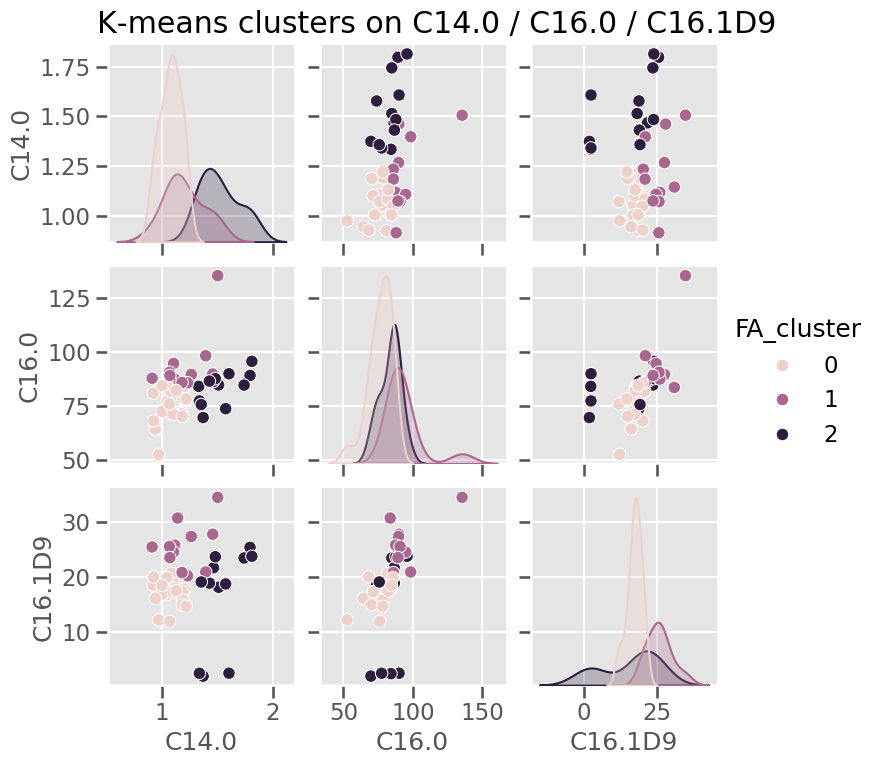

In [113]:
# 8. K‑means on headline fatty acids ---------------------------------

X_head = StandardScaler().fit_transform(df[headline_fa])
df["FA_cluster"] = KMeans(n_clusters=3, random_state=42).fit_predict(X_head)

sns.pairplot(df, vars=headline_fa, hue="FA_cluster")
plt.suptitle("K‑means clusters on C14.0 / C16.0 / C16.1D9", y=1.02)

save_fig("K-means_FAMEs")

✓ Saved: /content/drive/MyDrive/moringaseed_oil_location/figures/K-means_Tocopherols.png


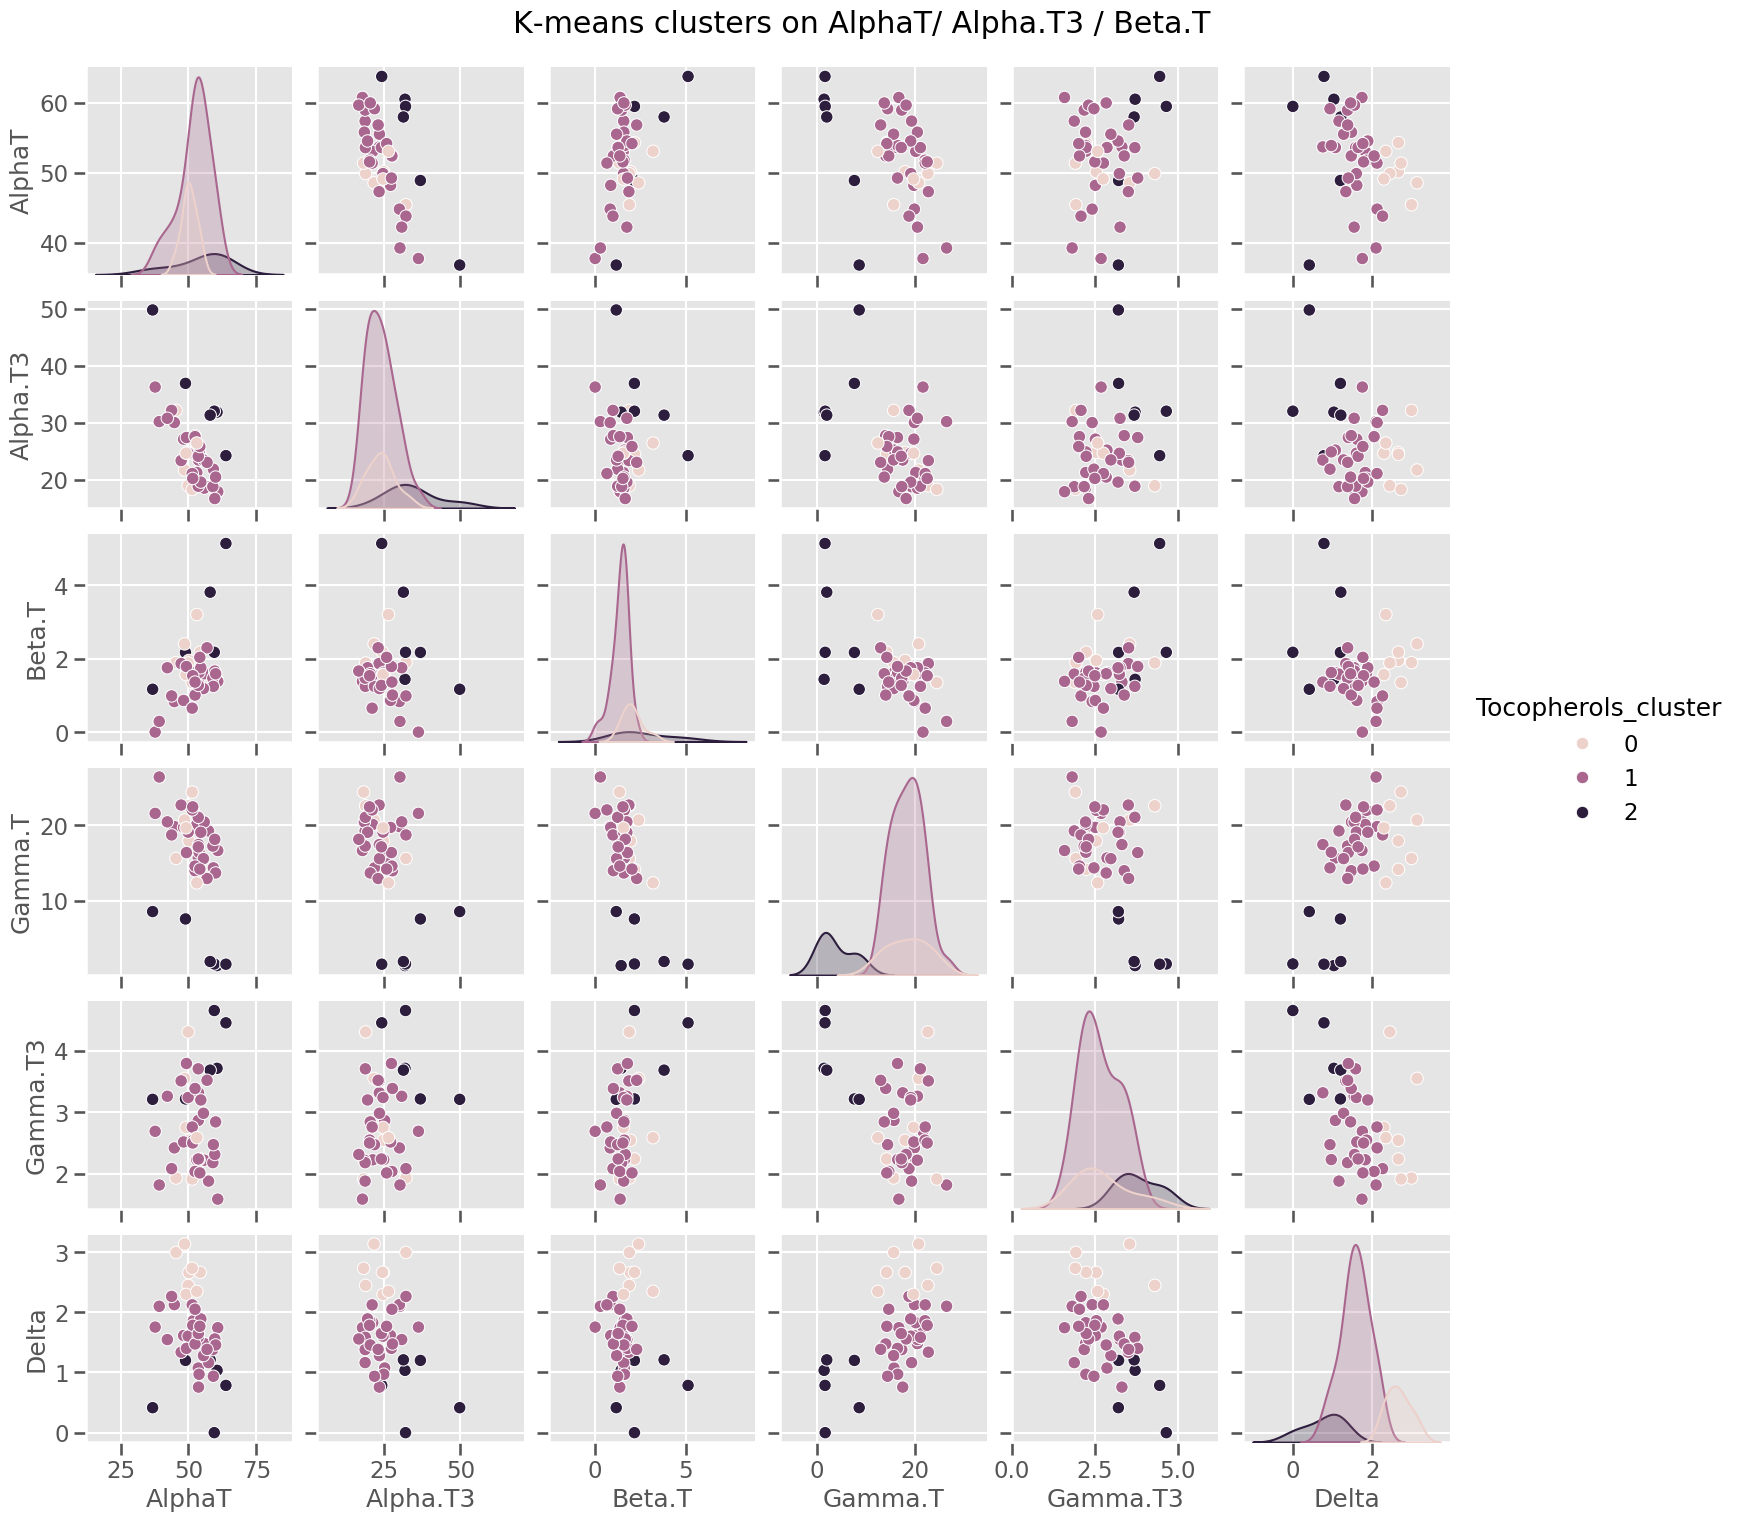

In [114]:
# K‑means on headline tocopherols ---------------------------------

X_head = StandardScaler().fit_transform(df[headline_tocopherols])
df["Tocopherols_cluster"] = KMeans(n_clusters=3, random_state=42).fit_predict(X_head)

sns.pairplot(df, vars=headline_tocopherols, hue="Tocopherols_cluster")
plt.suptitle("K‑means clusters on AlphaT/ Alpha.T3 / Beta.T", y=1.02)

save_fig("K-means_Tocopherols")

✓ Saved: /content/drive/MyDrive/moringaseed_oil_location/figures/K-means_Phytosterols.png


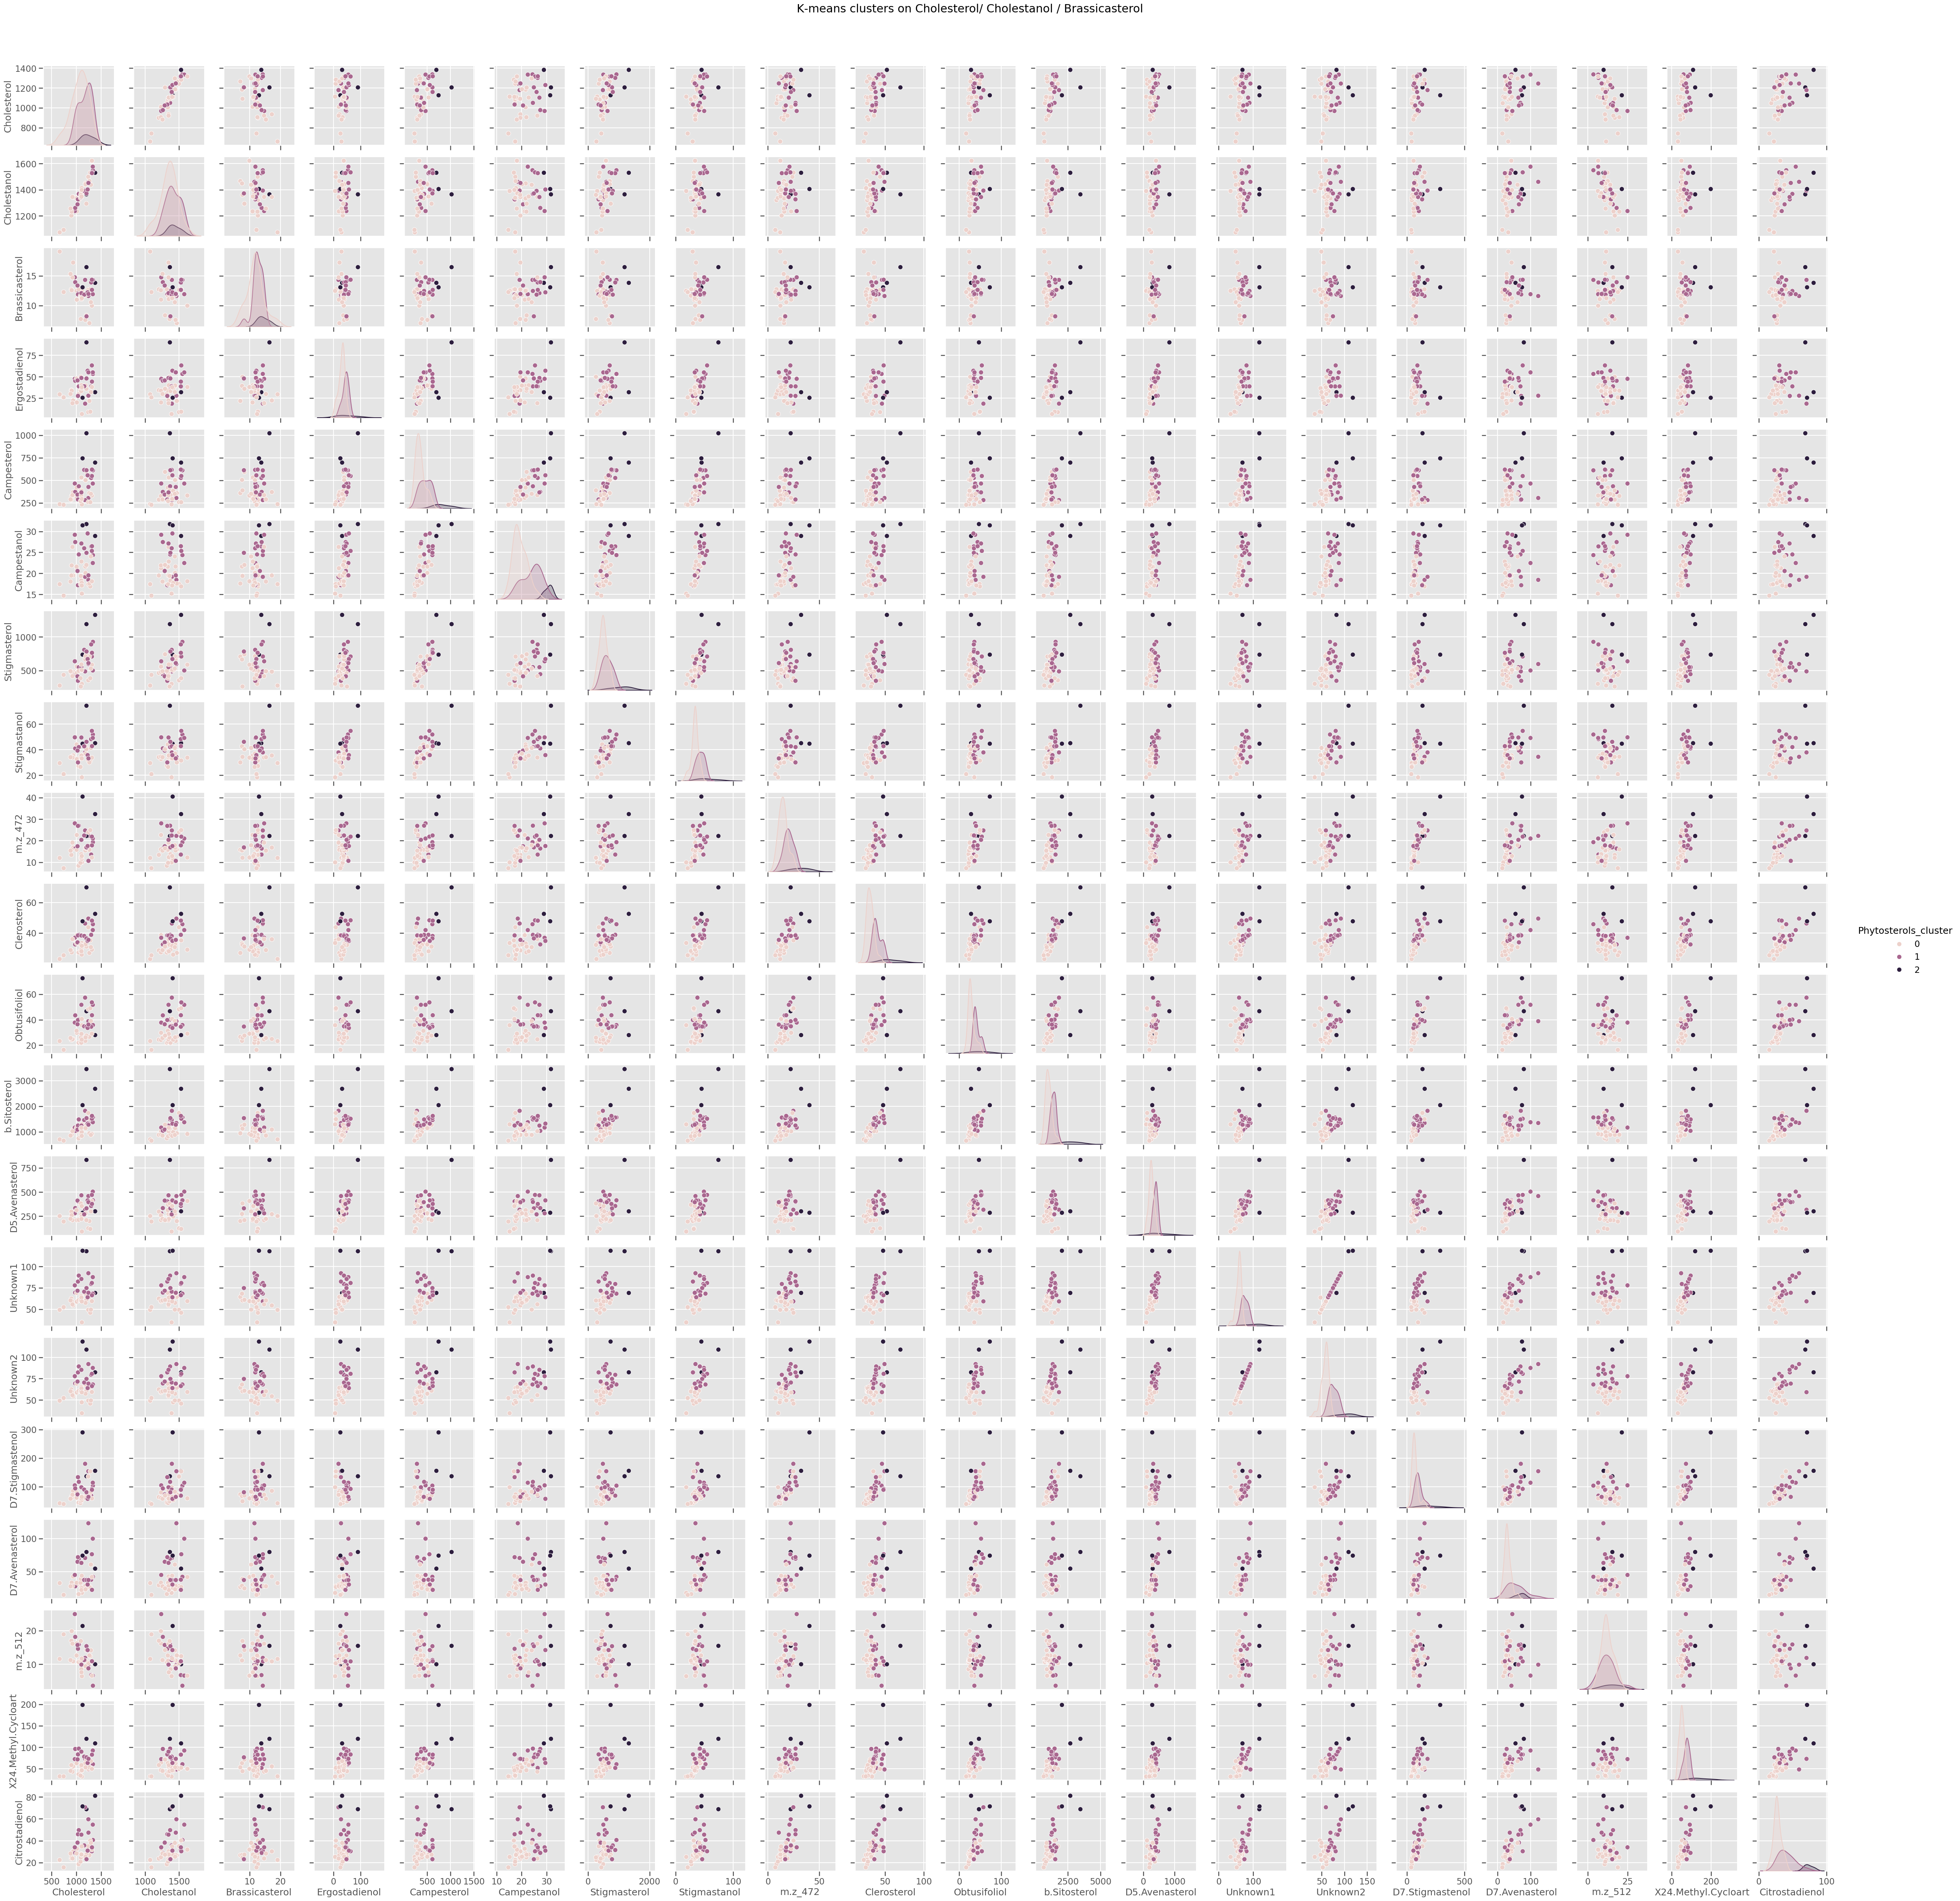

In [115]:
# K‑means on headline phytosterols ---------------------------------

X_head = StandardScaler().fit_transform(df[headline_phytosterols])
df["Phytosterols_cluster"] = KMeans(n_clusters=3, random_state=42).fit_predict(X_head)

sns.pairplot(df, vars=headline_phytosterols, hue="Phytosterols_cluster")
plt.suptitle("K‑means clusters on Cholesterol/ Cholestanol / Brassicasterol", y=1.02)

save_fig("K-means_Phytosterols")

In [132]:
#Radar plot
def radar_plot_top_fames(df, fame_cols, title, filename):
    # Step 1: Calculate total fatty acid content
    df["FAMEs"] = df[fames_cols].sum(axis=1)

    # Step 2: Pick top 3 accessions
    top_samples = df.nlargest(3, "FAMEs")["Samples"]

    # Step 3: Normalize all FAMEs for these samples
    subset = df[df["Samples"].isin(top_samples)][["Samples"] + fames_cols].copy()
    subset.set_index("Samples", inplace=True)
    norm_subset = (subset - subset.min()) / (subset.max() - subset.min())

    # Step 4: Set up radar plot
    angles = np.linspace(0, 2*np.pi, len(fame_cols), endpoint=False)
    angles = np.concatenate([angles, [angles[0]]])

    fig = plt.figure(figsize=(8, 8))
    ax = plt.subplot(111, polar=True)

    for idx, row in norm_subset.iterrows():
        values = np.concatenate([row.values, [row.values[0]]])
        ax.plot(angles, values, label=idx)
        ax.fill(angles, values, alpha=0.1)

    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(fame_cols, fontsize=10)
    ax.set_yticklabels([])
    plt.title(title, size=14)
    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
    plt.tight_layout()
    save_fig(radar_plot_top_fames)


In [133]:
def radar_plot_top_phytosterols(df, fame_cols, title, filename):
    # Step 1: Calculate total phytosterolscontent
    df["phytosterols"] = df[phytosterols_cols].sum(axis=1)

    # Step 2: Pick top 3 accessions
    top_samples = df.nlargest(3, "phytosterols")["Samples"]

    # Step 3: Normalize all phytosterols for these samples
    subset = df[df["Samples"].isin(top_samples)][["Samples"] + phytosterols_cols].copy()
    subset.set_index("Samples", inplace=True)
    norm_subset = (subset - subset.min()) / (subset.max() - subset.min())

    # Step 4: Set up radar plot
    angles = np.linspace(0, 2*np.pi, len(phytosterols_cols), endpoint=False)
    angles = np.concatenate([angles, [angles[0]]])

    fig = plt.figure(figsize=(8, 8))
    ax = plt.subplot(111, polar=True)

    for idx, row in norm_subset.iterrows():
        values = np.concatenate([row.values, [row.values[0]]])
        ax.plot(angles, values, label=idx)
        ax.fill(angles, values, alpha=0.1)

    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(fame_cols, fontsize=10)
    ax.set_yticklabels([])
    plt.title(title, size=14)
    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
    plt.tight_layout()
    save_fig(radar_plot_top_phytosterols)

In [134]:
def radar_plot_top_tocopherols(df, fame_cols, title, filename):
    # Step 1: Calculate total tocopherols content
    df["phytosterols"] = df[tocopherols_cols].sum(axis=1)

    # Step 2: Pick top 3 accessions
    top_samples = df.nlargest(3, "tocopherols")["Samples"]

    # Step 3: Normalize all tocopherols for these samples
    subset = df[df["Samples"].isin(top_samples)][["Samples"] + tocopherols_cols].copy()
    subset.set_index("Samples", inplace=True)
    norm_subset = (subset - subset.min()) / (subset.max() - subset.min())

    # Step 4: Set up radar plot
    angles = np.linspace(0, 2*np.pi, len(tocopherols_cols), endpoint=False)
    angles = np.concatenate([angles, [angles[0]]])

    fig = plt.figure(figsize=(8, 8))
    ax = plt.subplot(111, polar=True)

    for idx, row in norm_subset.iterrows():
        values = np.concatenate([row.values, [row.values[0]]])
        ax.plot(angles, values, label=idx)
        ax.fill(angles, values, alpha=0.1)

    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(fame_cols, fontsize=10)
    ax.set_yticklabels([])
    plt.title(title, size=14)
    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
    plt.tight_layout()
    save_fig(radar_plot_top_tocopherols)

✓ Saved: /content/drive/MyDrive/moringaseed_oil_location/figures/radar_top_tocopherols.png


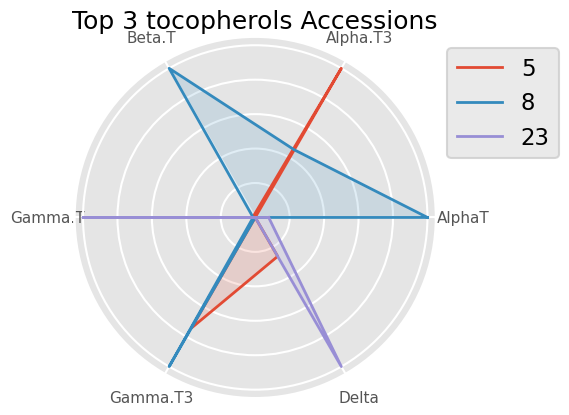

In [136]:
# Radar plot of top‑tocopherols accessions ------------------------------

# Find the top 3 samples with the highest 'AlphaT' (tocopherols)
top_tocopherols_ids = df.nlargest(3, "AlphaT")["Samples"]

# Generate the radar plot for the top tocopherols accessions
# Use headline_fa for the columns, as it contains the relevant fatty acids
radar_plot(top_tocopherols_ids, headline_tocopherols, "Top 3 tocopherols Accessions")

# Save the figure
save_fig("radar_top_tocopherols")

✓ Saved: /content/drive/MyDrive/moringaseed_oil_location/figures/radar_top_phytosterols.png


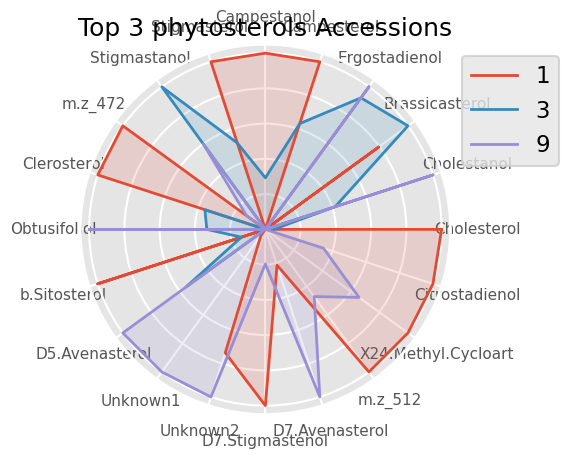

In [137]:
# Radar plot of top‑phytosterols accessions ------------------------------

# Find the top 3 samples with the highest 'Cholesterol' (phytosterols)
top_phytosterols_ids = df.nlargest(3, "Cholesterol")["Samples"]

# Generate the radar plot for the top tocopherols accessions
# Use headline_phytosterols for the columns, as it contains the relevant fatty acids
radar_plot(top_phytosterols_ids, headline_phytosterols, "Top 3 phytosterols Accessions")

# Save the figure
save_fig("radar_top_phytosterols")

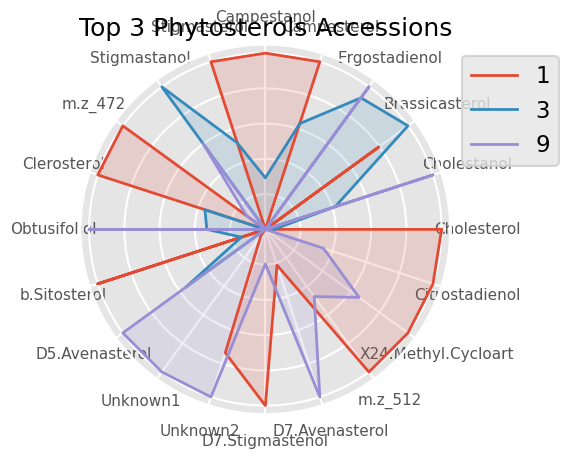

In [141]:
# Usage
top_phytosterols_ids = df.nlargest(3, "Cholesterol")["Samples"]
radar_plot(top_phytosterols_ids, headline_phytosterols, "Top 3 Phytosterols Accessions")

In [143]:
# ===================================================================
# 10. Save cleaned master table -------------------------------------
# ===================================================================
# Define the root path where you want to save the file
# Correcting the path to point to the directory, not include the Excel filename
ROOT = Path("/content/drive/MyDrive/moringaseed_oil_location/")

out_path = ROOT / "moringa_oil_master_clean.csv"
df.to_csv(out_path, index=False)
print(f"✓ Saved merged dataset → {out_path}")

✓ Saved merged dataset → /content/drive/MyDrive/moringaseed_oil_location/moringa_oil_master_clean.csv
